# Capstone Project Report

#### Table of Contents:

1. Introduction
2. [Overview](#top)
3. [Data Acquisition](#data_acquisition)
4. [Data Cleaning](#data_cleaning)
5. [Exploratory Data Analysis](#exploratory_data_analysis)
6. [Model testing](#model_testing)
7. [Further Research and Feature engineering](#feature_engineering)
8. [Assessment](#assessment)

# Introduction

This project looks at greyhound racing and attempts to predict the winner of a race based on historical performance.

Greyhound racing is a sport in which Greyhounds are raced around a track.  Track racing uses an artificial lure (now based on a windsock) that travels ahead of the dogs on a rail until the greyhounds cross the finish line. As with horse racing, greyhound races often allow the public to bet on the outcome.

![body](./greyhound_racing.jpg)

Track racing is has races over several distances and there are several classes or "Grades" of race.  These Grades are indictative of the speed of the dogs in them.

The prediction of greyhound racing is difficult simply due to the fluctuations in form or health any living mammal would experience.  In addition it has long been suspected that trainers help to artificially manipulate the results via a number of methods. 


<a id="top"></a>
# Overview

### <span style="color:darkblue">*_Definition of Aims_*</span>

The original aim of the report was to look for manipulation of the greyhounds to see if the performance was being artificially adjusted in such a way that the true performance wasn't being reflected.  i.e. The Greyhounds were being slowed down to lengthen their odds or doped so that they would win.

Although the aims of this project could have been met to a certain degree, nothing would have been definitive.  This is becuase there is nothing to "Train" the data on so it would have been an "unsupervised" problem.

Therefore the nature of the objective changed to predict the winner in each race.

As we'll see later on in this report, although the objective has changed slightly, the fact that we are aware that manipulation goes on in this sport has to be addressed.  This is done when we look at some of the Feature Engineering that had to be performed on the dataset.

### <span style="color:darkblue"> **_Data Acquisition_**</span>
[jump to section](#data_acquisition)

The acquisition of the data represented a large part of this project and presented numerous problems.  These will be discussed more in detail later but the data was acquired in several stages and ultimately 2 datasets where acquired to test which method was better:

- Data on the top 100 performing Dogs of the last year
- Data on all of the races of last year

The acquisition of the data in each case was tricky and presented it's own problems in terms of both the code and methodology in terms of how to approach these issues. 

This had to be done in several stages due to the large amount of data that had to be acquired. Therefore not only the method but time considerations had to be taken into account as well. 

Also the methods to acquire the specific data had to be estimated whic meant that there were issues to solve with cleaning....

### <span style="color:darkblue">_Data Cleaning_</span>
[jump to section](#data_cleaning)

The most difficult part of this process was the dealing with the raw data.  There were some elements where the acquisition was not consistent.  In some cases I was able to write code that was able to circumnavigate this.  In other cases the data was ignored but this represented < 2% of the total data so was deemed acceptable. 

Once in the dataframe this mainly consisted of changing type (e.g. from string to float / int/ or datetime) and cleaning the data following the import methods. 

There was also data that needed to be transformed.  Examples of this were things like the Greyhounds odds (which were in a string format of "3/1F") or the dates and times of races.  

### <span style="color:darkblue">_Exploratory Data Analysis_</span>
[jump to section](#exploratory_data_analysis)

Once the cleaned data was acquired, I had an initial look at some of the relationships betweens features and how they correlated.

Initial results were not useful. With many different grades of race and tracks running at different speeds then it required slicing of data.  Even then there were no clear correlations between different features apart from maybe odds and position (a result of bookmaker modelling).

However a look at some od the top performing dogs times and positions showed periods of "form" and so this was noted for further experimentation further down the line.

### <span style="color:darkblue">_Model Pre-processing and Testing_</span>
[jump to section](#model_testing)

There were several different models that I was looking to test the data on.  As this was a classification problem I wanted to test Logistic Regression, Decision tree and Random Forest to assess the inital model performance and ascertain which parameters of my models to tune and looks at which features I may need to engineer. 

Most of the initial testing was done on the data on the top 100 perfoming dogs of last year.  This was mainly due to size of data at the pre-processing stage.  

The raw data had initially had only 21 feature columns but with a dummy column needed for each dog (as well as the dogs Sire - Father and Dam - mother) the size of the dataframe would explode exponentially the more dogs that were featured. 

My aim for this project would be to compare datasets but ultimately, the modelling needs to be tuned and features need to be engineered before the final modelling is done on the larger dataset.  This is because the dataset on the 2016 data grows to over 25GB which means processing takes a long time.

The Baseline was established and then the models were run.  Initially the results were no better than the Baseline although this changed with better exploratory knowledge and feature engineering...

### <span style="color:darkblue">_Further research and Feature Engineering_</span>
[jump to section](#feature_engineering)

Further research into the world of Greyhound racing uncovered some practices that would help tune the model.  Dogs appeared to go through stages of form and performance.  Whether this was random or engineered by the trainer was left to one side currently and features were modelled on whether the greyhound was in form or not.  Plus I engineered a feature to describe whether the form was in an upward trend or downward trend.

I also tuned these features so they described the form on whether the greyhound won or not and some where it measured the position (if there were any cases where the dog went from first to second or first to last for example).  This was in addition to some simpler features that were engineered like age of the dog.  

This showed a significant increase in accuracy performance.  However, if the model was to be useful, precision and recall were going to be better measures as discussed in the report...

### <span style="color:darkblue">_Assessment_</span>
[jump to section](#assessment)

<a id="data_acquisition"></a>
# <span style="color:darkblue">_Data Acquisition_</span>
[back to top](#top)

The data that I need for this project is in the Greyhound Board of Great Britain Website.  Within the website is an archive of all Greyhound races.  It is this archive that I will scrape to get my data.

There were two datsets described earlier that I was looking to get:

- **Data on the top 100 performing Dogs of last year**
- **Data on all races of last year**

First we shall look at acquiring data for the top 100 performing Dogs of last year:

#### **The Top 100 performing Dogs**

- The website I will investigate is from the Greyhound Board of Great Britain (GBGB).
- This requires some input information.
- Get the top 100 performing Dogs for 2016 from Greyhound Stats website
- Use this information to plug into GBGB site. This will yield all races that these dogs participated in
- Then use race information to get full race results

![body](./images/top_100_schematic.png)
<img src="images/top_100_schematic.png" width=750>

Below is the homepage to "greyhound-data" website.  This tells us the best performing greyhounds for any given year.

This website will be used as a "seed" for getting information out of the Greyhound Board of Great Britain website.

Looking at the style of the website it is clear that there is a lot of potentially important information that can also be used as a reference later so will attempt to get as much information from this as possible.  

<img src="images/greyhound_stats_homepage.png" width=850>

In [1]:
# Import Packages

import re
import requests
from bs4 import BeautifulSoup

import pandas as pd
import numpy as np
from datetime import datetime

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
plt.style.use('ggplot')

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

Look at the HTML to know how to parse data.

In [2]:
Url = 'http://www.greyhound-data.com/db.php?masterbreeders=8&raceland=UK&year=lastyears&mindist=450&maxdist=450&go=+Calculate+statistic+'

page = requests.get(Url)

test_soup = BeautifulSoup(page.content, 'html.parser')

#print test_soup.prettify()

The website of the Greyhound Board of Racing will provide us the information on each Greyhound.  However, it will not give us names of active greyhounds.  

For this we need to look elsewhere.  The website "greyhound-Stats" does provide a summary of the best greyhounds based on your search.  I am looking at the best Greyhounds in England for 2016 to give me a Training set to provide EDA on.  

The result is that we are given a table with 10 columns.  This information includes: Name, Sex, Father (Sire), Mother (Dam), Wins, Races, Win Percentage, First places, second places and third places.  

In order to extract the infortmation we can see below looking at the HTML of the page that each "Name" column has a ```<td align="left">``` tag.  We can look for these to extract Name, Sire and Dam information.  The rest of the information looks trickier and we'll deal with this in a minute.```

<img src="images/greyhound_names.png" width=900>

In [3]:
# For all names in the webpage
name_results = test_soup.find_all('td', align='left')

# Have a quick look just to be sure
name_results[0:6]

[<td align="left"><a href="d?i=1598092&amp;z=GTXjP0">Ballyhoe Bertie [IE/UK 2007]</a></td>,
 <td align="left">Droopys Maldini</td>,
 <td align="left">Frontier Music</td>,
 <td align="left"><a href="d?i=1688150&amp;z=GTXjP0">Geneva Jay Jay [IE/UK 2008]</a></td>,
 <td align="left">Geneva Captain</td>,
 <td align="left">Refined Plan</td>]

In [4]:
# Create a function that can extract the names from the website.  We can use these on the Greyhond board website to 
# get the race results for each of these Greyhounds

def get_name(result):
    dog = result.get_text()
    name = dog.split(' [')[0]
    return name

# Testing the function
get_name(name_results[3])

u'Geneva Jay Jay'

In [6]:
# Put all name results into a list based on the "name_results" list.  As all the names, Sire names and Dam names are
# the only pieces of information.  We can grab these names knowing that the name information for each column will 
# appear every 3 times.

# Create empty lists
greyhound_names = []
greyhound_sires = []
greyhound_dams = []

# For dog names start at beginning and get every 3rd result
for i in range(0, len(name_results)-2, 3):
    dog = get_name(name_results[i])
    greyhound_names.append(dog)

for i in range(1, len(name_results)-1, 3):
    dad = get_name(name_results[i])
    greyhound_sires.append(dad) 
    
for i in range(2, len(name_results), 3):
    mum = get_name(name_results[i])
    greyhound_dams.append(mum)
    
print 'Number of Names: \t', len(greyhound_names)
print 'Number of Sires: \t', len(greyhound_sires)
print 'Number of Dams: \t', len(greyhound_dams)

Number of Names: 	100
Number of Sires: 	100
Number of Dams: 	100


#### Extracting the remainder of the information

Although the rest of the information is not needed for use to loop through information on the other website, it may come in handy for our EDA or further down the line so I did extract this information as well.

This was just a safety net proceedure and I don't feel it will serve any purpose to detail this here as it is not directly relevant to the project.  This is referenced in my main Capstone notebook. The names are the main piece of information needed.

The whole table was saved as a dataframe to a csv file called **'greyhound_data.csv'**

### Web Scraping Stage 2 - Greyhound Board of Great Britain

#### Indentifying the races our Greyhounds have participated in 


<img src="images/GBGB_start_page.png" width=800>

The result archive from the Greyhound Board of Great Britain webpage needs input information before we can get anything out.  

Using the names from the Greyhound Data website in the previous section, we can use the names of the top performing dogs to look at the races they particpated in.  From there we can analyse their performance.

For the website we can see from the web address how it deals with dog names.  The names are split by the special character phrase "%20" between each word.

See an example URL for the Greyhound "Ide I dont know"

**`http://www.gbgb.org.uk/Racecard.aspx?dogName=Ide%20I%20Dont%20Know`**

First a function must be created to convert the names in our Dataframe into something that will be read by the website.

In [7]:
# Create a function to generate the end of the urls that I will be looking at
def url_ender(name):
    url_name = name.split(' ')
    end_url = '%20'.join(url_name)
    return end_url

# Test the function
url_ender('Geneva Jay Jay')

'Geneva%20Jay%20Jay'

#### Extracting the Race information

<img src="images/race_page.png" width=900>

The information concerning the Greyhound's performance relative to the others will be in the race result.  

Each race result has it's own unique id which is inside a tag.

The website code that I'm interested in is nested within the `<tr class='rgRow'>` or `<tr class=rgAltRow>` tags.

I have to build a regex to look for either of these possibilities.

Then have to look inside the tag and extract the "id" number that is inside the `<a href=>` tag for the race and for the meeting.




```[<tr class="rgRow" id="ctl00_ctl00_mainContent_cmscontent_DogRaceCard_lvDogRaceCard_ctl00__0">\n<td>20/04/17</td><td align="center">480</td><td align="center">5</td><td align="center">4.59</td><td align="center">6</td><td align="center">5 1/4</td><td>Holdem Pepe</td><td>Monmore Green</td><td>SAw,MidToW</td><td align="center">29.08</td><td align="center">-50</td><td>20/1</td><td align="center">OR</td><td align="center">28.98</td><td><a href="resultsRace.aspx?``` <span style="color:blue"> *id=1975552* </span>"  ```title="Race">Race</a></td><td><a href="resultsMeeting.aspx?id=147366" title="Meeting">Meeting</a></td>\n</tr>,```

<span style="color:blue"> <tr class="rgAltRow</span>
```id="ctl00_ctl00_mainContent_cmscontent_DogRaceCard_lvDogRaceCard_ctl00__1">\n<td>16/04/17</td><td align="center">450</td><td align="center">4</td><td align="center">4.64</td><td align="center">4</td><td align="center">2 1/4</td><td>Chancy Chappie</td><td>Poole</td><td>SAw</td><td align="center">27.58</td><td align="center">N</td><td>9/4</td><td align="center">A2</td><td align="center">27.80</td><td><a href="resultsRace.aspx?id=1974119" title="Race">Race</a></td><td><a href="resultsMeeting.aspx?id=147241" title="Meeting">Meeting</a></td>\n</tr>,```
<tr class="rgRow" id="ctl00_ctl00_mainContent_cmscontent_DogRaceCard_lvDogRaceCard_ctl00__2">\n<td>13/04/17</td><td align="center">630</td><td align="center">3</td><td align="center">13.06</td><td align="center">5</td><td align="center">9 1/2</td><td>Stags Star</td><td>Monmore Green</td><td>EarlyP,Middle,Crd6</td><td align="center">39.07</td><td align="center">-80</td><td>8/1</td><td align="center">OR</td><td align="center">39.01</td><td><a href="resultsRace.aspx?id=1973615" title="Race">Race</a></td><td><a href="resultsMeeting.aspx?id=147207" title="Meeting">Meeting</a></td>\n</tr>```

In [9]:
# Extracting the Race Id's for the races that the Dogs that I'm interested in viewing have raced in.

# Building the Regex so look only for the tags that I'm interested in.

def get_race_id(result):
    for race in result.find_all('td'):
        if race.a is not None and 'resultsRace' in race.a:                  # Calling the info in the "a" tag for "Race"
            string =  str(race.a)                                    # Make into a string
            id_num = re.search('\d+', string)                        # Search for any numeric value
            race_number = int(id_num.group())                        # Return integer of that number
            return race_number

In [ ]:
#Now the function has been defined it can be used to loop through the soup object and get the race ids.

race_ids = []

hb = soup.find_all('tr', class_=(re.compile('rgRow|rgAltRow')))

for result in hb:
    race_ids.append(get_race_id(result))

#### **Turning the Page**

One of the problems I encountered with this website is that was of aspx type.  This meant that when I turned the page, the url stayed the same.

![body](./name_results_3.png)

This meant that I couldn't loop through the urls.  Therefore I decided to use the headless browser **Selenium..**

Once I'd identified the correct element for turning the page I could use Selenium to click on the button to turn the page....


<img src="images/page_turn.png" width=900>

In order to make sure that the program knew when to stop, I needed to create a function to identify the number of pages of race ids for each dog / date.

Therefore I needed to define a function to this.

In [215]:
# This defines a function that gets the maximum number of pages from the initial page

def page_number(soupObj):
    page = soup.find('div', class_="rgWrap rgInfoPart").get_text()
    max_page = int(page.split('in ')[1][:2])
    return max_page
page_number(soup)

4

### A Note on the dataset for all races of last year

As mentioned above.  Two Datasets were obtained.  At this point it is worth mentioning the dataset that took race ids for every race in 2016.  This is because at this point, the method for acquiring the race ids is very similar.  

See schematics below...

### **For Dog Names**


<img src="images/dog_name_schematic.png" width = 850>

In [ ]:
# Open up database to get Greyhound Names
greyhounds = pd.read_csv('greyhound_data.csv')

# Select Names to go through
names_2016 = greyhounds[greyhounds['Year'] == 2016].Name.values

In [ ]:
# Now I can go through the top 100 Greyhounds and get the Race Ids for the races that they participated in

from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from time import sleep
url_template = ("http://www.gbgb.org.uk/Racecard.aspx?dogName=")


top_100_race_ids = []

# open the driver
driver = webdriver.Chrome(executable_path="../../chromedriver")

for name in names_2016:                                                     # Loop through Dog Names
    url = url_template + url_ender(name)                                    #Calling function I wrote earlier
    driver.get(url)
    html = driver.page_source
    soup = BeautifulSoup(html, 'html.parser')
    n = 1
    for i in range(page_number(soup)):                                      # Using page number function for each dog
        if i < page_number(soup): 
            print 'Page', n, 'of', page_number(soup), 'for', name
            html = driver.page_source
            soup = BeautifulSoup(html, 'html.parser')
            results = soup.find_all('tr', class_=(re.compile('rgRow|rgAltRow'))) # Regex to get the alternate rows info is in
            for result in results:
                top_100_race_ids.append(get_race_id(result))                # Calling function to get result
            n += 1
        page_turn = driver.find_element_by_class_name('rgPageNext')         # Turning page onto next
        page_turn.click()
        sleep(4)                                                            # Allow page to load


driver.close()

### For Dates

<img src="images/date_schematic.png" width=850>

In [ ]:
# Now I can go through the dates of 2016 and get the Race Ids for the races.

from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from time import sleep

url = ("http://www.gbgb.org.uk/Results.aspx")


race_ids_2016 = []
date_dict = {1: 31}
            2: 29,
            3: 31,
            4: 30,
            5: 31,
            6: 30,
            7: 31,
            8: 31,
            9: 30,
            10: 31,
            11: 30,
            12: 31}

# open the driver
driver = webdriver.Chrome(executable_path="../../chromedriver")
driver.get(url)
for key in date_dict.keys():
    for day in range(1,date_dict[key]+1):
        page_turn = driver.find_element_by_xpath('//*[@id="ctl00_ctl00_mainContent_cmscontent_TrackRaces_dtpDate_dateInput"]')
        date = str(day) + '/' + str(key) + '/2016'
        page_turn.clear()
        page_turn.send_keys(date, Keys.RETURN)
        sleep(3)
        html = driver.page_source
        soup = BeautifulSoup(html, 'html.parser')
        n = 1
        for i in range(page_number(soup)):                                           # Using page number function for each dog
            if i < page_number(soup): 
                print 'Page', n, 'of', page_number(soup), 'for', day,'/',key
                html = driver.page_source
                soup = BeautifulSoup(html, 'html.parser')
                results = soup.find_all('tr', class_=(re.compile('rgRow|rgAltRow'))) # Regex to get the alternate rows info is in
                for result in results:
                    jan_24_2017_race_ids.append(get_race_id(result))
                n += 1
            content = driver.find_element_by_class_name('rgPageNext')            # Turning page onto next
            content.click()
            sleep(4)                                                    # Allow page to load
        
        
driver.close()

The method is similar for both except that for getting the race ids by date there is an extra element of getting Selenium to enter the dates in the box on the page.

List of race ids were made and saved.  The method for extracting each element of information from the race card was common to both datasets.

#### Scraping Issues

In the code above I always had a counter printing out the current status.  Sometimes there were interuptions to the webscrape and so I had to restart the scrape from the position that webscrape stopped and attach the lists to one another.  

This was particularly prevalent in the scrape for dates and I did end up doing this in 2 month blocks and then appending the lists to one another. 

The final race id lists for both the top 100 dogs and for all the races of 2016 where turned into dataframes and saved as csv files.

## Webscraping Stage 3

When it came to scraping the information for each race, the tabular information was located at a place with its own url which made the process of looping through a lot easier.

![body](./race_id_url.png)

Each Race has a race card with all the information on the Greyhounds. This is information regarding position, weight, time, odds etc.

Functions will need to written to extract all the pieces of information. All the information is located under one class header of "resultsBlockHeader"

<img src="images/race_table.png" width=850>

Then I had to define the necessary functions to extract each individual piece of information...

In [ ]:
# Defining functions to extract each piece of information from the racecard.

def get_track(soupObj):
    for header in soupObj.find_all("div", class_="resultsBlockHeader"):
        track = header.find("div", class_="track").get_text(strip=True)
    return track

def get_date(soupObj):
    for header in soupObj.find_all("div", class_="resultsBlockHeader"):
        date = header.find("div", class_="date").get_text(strip=True)
    return date

def get_datetime(soupObj):
    for header in soupObj.find_all("div", class_="resultsBlockHeader"):
        datetime = header.find("div", class_="datetime").get_text(strip=True)
    return datetime

def get_grade(soupObj):
    for header in soupObj.find_all("div", class_="resultsBlockHeader"):
        grade = header.find("div", class_="grade").get_text(strip=True)
    return grade

def get_distance(soupObj):
    for header in soupObj.find_all("div", class_="resultsBlockHeader"):
        distance = header.find("div", class_="distance").get_text(strip=True)
    return distance

def get_prizes(soupObj):
    for header in soupObj.find_all("div", class_="resultsBlockHeader"):
        prizes = header.find("div", class_="prizes").get_text(strip=True)
    return prizes

def get_going_allowance(soupObj):
    header = soup.find("div", class_="resultsBlockFooter")
    result = header.find("div").get_text(strip=True)
    try:
        going = result.split(':')[1]
    except:
        going = result
    return going

def get_dog_name(soupObj):
    greyhound_participants = []
    for header in soupObj.find_all("div", class_="resultsBlockHeader"):
        results = header.find_next_sibling("div", class_="resultsBlock").find_all("ul", class_="line1")
        for result in results:
            dog_name = result.find("li", class_="greyhound").get_text(strip=True)
            greyhound_participants.append(dog_name)
    return greyhound_participants

def get_position(soupObj):
    position = []
    for header in soupObj.find_all("div", class_="resultsBlockHeader"):
        results = header.find_next_sibling("div", class_="resultsBlock").find_all("ul", class_="line1")
        for result in results:
            dog_name = result.find("li", class_="first essential fin").get_text(strip=True)
            position.append(dog_name)
    return position

def get_trap_number(soupObj):
    traps = []
    for header in soupObj.find_all("div", class_="resultsBlockHeader"):
        results = header.find_next_sibling("div", class_="resultsBlock").find_all("ul", class_="line1")
        for result in results:
            dog_name = result.find("li", class_="trap").get_text(strip=True)
            traps.append(dog_name)
    return traps
    
def get_odds(soupObj):
    odds = []
    for header in soupObj.find_all("div", class_="resultsBlockHeader"):
        results = header.find_next_sibling("div", class_="resultsBlock").find_all("ul", class_="line1")
        for result in results:
            dog_name = result.find("li", class_="sp").get_text(strip=True)
            odds.append(dog_name)
    return odds
    
def get_time_trap(soupObj):
    time_trap = []
    for header in soupObj.find_all("div", class_="resultsBlockHeader"):
        results = header.find_next_sibling("div", class_="resultsBlock").find_all("ul", class_="line1")
        for result in results:
            dog_name = result.find("li", class_="timeSec").get_text(strip=True)
            time_trap.append(dog_name)
    return time_trap

def get_time_distance(soupObj):
    time_dist = []
    for header in soupObj.find_all("div", class_="resultsBlockHeader"):
        results = header.find_next_sibling("div", class_="resultsBlock").find_all("ul", class_="line1")
        for result in results:
            dog_name = result.find("li", class_="timeDistance").get_text(strip=True)
            time_dist.append(dog_name)
    return time_dist

def get_weight(soupObj):
    weights = []
    results = soup.find_all("ul", class_="line2")
    for result in results:
        comment = result.find("li", class_="first essential").get_text(strip=True)
        comment = [entry for entry in comment.split('  ') if entry != '']
        try:
            weight_num = re.search('\d\d.\d', comment[4])
            weight = float(weight_num.group())
        except:
            weight = 'NA'
        weights.append(weight)
    return weights

# This function not only retrieves the name of the Dam (mother) but also when the greyhound was born

def get_dam(soupObj):
    dams = []
    born = []
    results = soup.find_all("ul", class_="line2")
    for result in results:
        comment = result.find("li", class_="first essential").get_text(strip=True)
        comment = [entry for entry in comment.split('  ') if entry != '']
        if len(comment) > 3:
            dam_data = comment[3]
            dam_data = dam_data.split(' ')
            try:
                born_data = dam_data[-2]
            except:
                born_data = 'NA'
            dam_data = ' '.join(dam_data[:-2])
            born.append(born_data)
            dams.append(dam_data)
        else:
            born.append('nan')
            dams.append('nan')
    return dams, born

# This function not only gets the Sire (father) of the dog but also a random element possibly the sex

def get_sire(soupObj):
    sires = []
    random = []
    results = soup.find_all("ul", class_="line2")
    for result in results:
        comment = result.find("li", class_="first essential").get_text(strip=True)
        comment = [entry for entry in comment.split('  ') if entry != '']
        if len(comment) > 1:
            sire_data = comment[1]
            sires.append(sire_data[2:])
            random.append(sire_data[:2])
        else:
            sires.append('nan')
            random.append('nan')
    return sires, random

def get_trainer(soupObject):
    trainers = []
    results = soup.find_all("ul", class_="line2")
    for result in results:
        tr_info = result.find("li", class_="essential trainer").get_text(strip=True)
        trainer = tr_info.split(':')[1]
        trainers.append(trainer[:-1])
    return trainers   

def get_comment(soupObj):
    comments = []
    results = soup.find_all("ul", class_="line3")
    for result in results:
        comment_info = result.find("li", class_="first essential comment").get_text(strip=True)
        comment_info = comment_info.split(':')[1]
        comments.append(comment_info)
    return comments

#### Now scrape all the racecard information

First load the Race id's captured from the last stage to loop through.

In [ ]:
# Load CSV file

selenium_race_ids = pd.read_csv('top_100_race_2016.csv')

# Get all unique Race Ids to loop through

gbgb_race_ids = list(selenium_race_ids.race_id.unique())

A dictionary was defined to hold the various features of the data and the race ids were looped through to extract all the information.

In [ ]:
# Define the Url stem to which I can add the Race Ids to loop through racecards. 
url_stem = 'http://www.gbgb.org.uk/resultsRace.aspx?id='

# Define a dictionary that will hold all racecard information
gbgb_dict = {'Race_id' : [],
            'Name': [],
            'Position' : [],
            'Sire': [],
            'Dam' : [],
            'Born' : [],
            'Random' : [],
            'Trap_no' : [],
            'Odds' : [],
            'Time_trap' : [],
            'Time_distance' : [],
            'Weight' : [],
            'Track' : [],
            'Trainer' : [],
            'Comment' : [],
            'Date' : [],
            'Datetime' : [],
            'Grade' : [],
            'Distance' : [],
            'Prizes' : [],
            'Going_allowance': []}

i = 1
for race in gbgb_race_ids:
    Url = url_stem + str(race)
    page = requests.get(Url)
    soup = BeautifulSoup(page.content, 'html.parser')
    gbgb_names = get_dog_name(soup)                                                   # Using functions defined earlier
    if gbgb_names is not None:                                                        # Check in case of empty result
        if i % 50 == 0:
            print i, 'out of', len(gbgb_race_ids), 'race_id :', gbgb_race_ids[i]  # Progress counter
        gbgb_dict['Name'].append(gbgb_names)                            
        gbgb_dict['Race_id'].append([race] * len(gbgb_names))                         # Append Race_id to each dog entry
        gbgb_dict['Position'].append(get_position(soup))
        gbgb_dict['Sire'].append(get_sire(soup)[0])
        gbgb_dict['Dam'].append(get_dam(soup)[0])
        gbgb_dict['Born'].append(get_dam(soup)[1])
        gbgb_dict['Random'].append(get_sire(soup)[1])
        gbgb_dict['Trap_no'].append(get_trap_number(soup))
        gbgb_dict['Odds'].append(get_odds(soup))
        gbgb_dict['Time_trap'].append(get_time_trap(soup))
        gbgb_dict['Time_distance'].append(get_time_distance(soup))
        gbgb_dict['Weight'].append(get_weight(soup))
        gbgb_dict['Track'].append([get_track(soup)] * len(gbgb_names))
        gbgb_dict['Trainer'].append(get_trainer(soup))
        gbgb_dict['Comment'].append(get_comment(soup))
        gbgb_dict['Date'].append([get_date(soup)] * len(gbgb_names))
        gbgb_dict['Datetime'].append([get_datetime(soup)] * len(gbgb_names))
        gbgb_dict['Grade'].append([get_grade(soup)] * len(gbgb_names))
        gbgb_dict['Distance'].append([get_distance(soup)] * len(gbgb_names))
        gbgb_dict['Prizes'].append([get_prizes(soup)] * len(gbgb_names))
        gbgb_dict['Going_allowance'].append([get_going_allowance(soup)] * len(gbgb_names))
        i += 1
    else:
        print 'Race_id to pass:', gbgb_race_ids[i]
        i += 1
        pass
        

The dictionary was then transformed into a dataframe.  

Below is the code and process for making the dataframe for my test data. 

In [ ]:
# Make a copy as the dictionary is temporary
test = gbgb_dict.copy()

In [ ]:
# Each element is a list of lists so they are appended together to make one list.  Lengths are checked for equality.

for key in test.keys():
    test[key] = [a for b in test[key] for a in b]
    
for key in test.keys():
    print key, len(test[key])

In [ ]:
# Turned into a dataframe and then saved.

test_df = pd.DataFrame(test)

test_df.to_csv('test_data.csv', encoding='utf-8')

The scrape of the racecard information was lengthy.  At times it was easier to scrape in 2 month blocks.  The resultant dataframes were then concatenated together.

During the process some of the functions had to be tuned if they were throwing out errors or missing information.  Particularly the information in the comment at the bottom of the racecard results as this could vary in length.

In time spent, this part has represented the largest part of the project so far.  The nature of the website and dealing with javascript did mean that I had to circumvent this problem.  The selenium package was of great help for this and overcoming this obstacle.



<a id="data_cleaning"></a>
# <span style="color:darkblue">_Data Cleaning_</span>
[back to top](#top)

The data in it's raw form was mostly string objects that contained valuable numerical information (time, distance etc.).

The data was first loaded and examined.

In [2]:
# Load the data
dogs = pd.read_csv('gbgb_raw_data.csv')

# Drop the old index.  Should have dropped this when saving dataframe originally.
dogs = dogs.drop('Unnamed: 0', axis=1)
dogs.head(2)

,Born,Comment,Dam,Date,Datetime,Distance,Going_allowance,Grade,Name,Odds,...,Prizes,Race_id,Random,Sire,Time_distance,Time_trap,Track,Trainer,Trap_no,Weight
0,Oct-2014,"QAw,ALed",Springwell Kiely,29/04/17,21:24 |,450m |,N,A1 |,Springwell Frano,3/1,...,"1st £143, Others £30 Race Total £293",1978858,d,Kinloch Brae,27.47,5.03,Sunderland |,P Miller,4,34.1
1,Jun-2014,"CrdRnUp,RanOn",Beaming Owl,29/04/17,21:24 |,450m |,N,A1 |,Whites Mccool,5/1,...,"1st £143, Others £30 Race Total £293",1978858,d,Vans Escalade,27.98 (6 1/4),5.15,Sunderland |,P Miller,3,31.1


In [3]:
# Look at column types.  Expecting nearly all object columns. 

dogs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28587 entries, 0 to 28586
Data columns (total 21 columns):
Born               28586 non-null object
Comment            28573 non-null object
Dam                28585 non-null object
Date               28587 non-null object
Datetime           28587 non-null object
Distance           28587 non-null object
Going_allowance    27464 non-null object
Grade              28587 non-null object
Name               28587 non-null object
Odds               28587 non-null object
Position           28587 non-null int64
Prizes             28306 non-null object
Race_id            28587 non-null int64
Random             28587 non-null object
Sire               28587 non-null object
Time_distance      28240 non-null object
Time_trap          28094 non-null object
Track              28587 non-null object
Trainer            28587 non-null object
Trap_no            28587 non-null int64
Weight             28575 non-null float64
dtypes: float64(1), int64(3), ob

In [4]:
# Check for missing values

dogs.isnull().sum()

Born                  1
Comment              14
Dam                   2
Date                  0
Datetime              0
Distance              0
Going_allowance    1123
Grade                 0
Name                  0
Odds                  0
Position              0
Prizes              281
Race_id               0
Random                0
Sire                  0
Time_distance       347
Time_trap           493
Track                 0
Trainer               0
Trap_no               0
Weight               12
dtype: int64

**Note on missing values:**

There are some missing values in certain columns.  I will drop the missing values rather than impute them.  My reasons are twofold:

- The missing values are less than 5% of the data and so I don't believe will effect the integrity of the data.
- It is suspected that there is manipulation going on and in order to see it I must be sure the data is accurate.

In [5]:
# Missing values were dropped

dogs.dropna(inplace=True)
dogs.shape

(26439, 21)

Now that the missing data had been dropped there was some tidying of the data.

Some mapping functions were wrtten to tidy some of the entries.

In [6]:
# Clean the Track data
# There is some text at the end of the name
dogs['Track'] = dogs['Track'].map(lambda x: x[:-3])

# Clean Datetime column
dogs['Datetime'] = dogs['Datetime'].map(lambda x: x[:-3])

# Cleaning the Grade data
dogs['Grade'] = dogs['Grade'].map(lambda x: x[:-3])

Then some intial column transformation

In [7]:
# Initial column transformation.  Create a numerical time column as this could be one of my targets
# The first 5 digits is always the time so will take that to convert to float

dogs['Time'] = dogs['Time_distance'].map(lambda x: x[:5] if type(x) != float else x)

# Make the time column as type float
dogs['Time'] = dogs['Time'].astype(float)

In [8]:
# Look at values in Going allowance column
dogs.Going_allowance.value_counts().head()

N      12262
-10     4457
+10     3868
-20     2577
-30     1171
Name: Going_allowance, dtype: int64

In [9]:
# Transform N values to represent an number
dogs['Going_allowance'] = dogs['Going_allowance'].map(lambda x: 0 if x == 'N' else x)  

# Make the Going allowance column as type float
dogs['Going_allowance'] = dogs['Going_allowance'].astype(float)

In [10]:
# Engineer a column for Odds.  Will convert to decimal odds.

# Write a function to split into elements and convert to float.  

def odds_converter(df_obj):
    odd_obj = re.search('[0-9]+[/][0-9]+', df_obj)                       
    fr_odds = odd_obj.group()
    odds = fr_odds.split('/')
    decimal_odds = float(odds[0])/float(odds[1]) + 1
    return decimal_odds

# Test the function
odds_converter('3/1F')

4.0

In [11]:
# Map across the column
dogs['Decimal_odds'] = dogs['Odds'].map(lambda x: odds_converter(x))

In [12]:
# Map the Distance column too
dogs['Distance'] = dogs['Distance'].map(lambda x: float(x.split('m')[0]))

# Make a column for First Prize so can use as a feature
dogs['First_prize'] = dogs['Prizes'].map(lambda x: x.split('£')[1][:3])

# Some prizes are less than three figures so needed tidying
dogs['First_prize'] = dogs['First_prize'].map(lambda x: x[:2] if ',' in x else x)
dogs['First_prize'] = dogs['First_prize'].astype(int)

Some of the columns were converted to datetime so that they could be used later and for computing the dogs age.

In [13]:
# Column transformed then converted to datetime
dogs['Date_time'] = dogs.Date + ' ' + dogs.Datetime
dogs['Date_time'] = dogs['Date_time'].map(lambda x: pd.datetime.strptime(x, '%d/%m/%y %H:%M'))

# Born column converted then used to compute age in days.
dogs['Born'] = pd.to_datetime(dogs['Born'])
dogs['Age'] = dogs['Date_time'] - dogs['Born']

# Then converted to numeric value as could be a feature in modelling
dogs['Age'] = dogs['Age'].astype(str)
dogs['Age'] = dogs['Age'].map(lambda x: int(x[:4]))

# Initial transformation to test if time of day has an effect
# This was done to help on processing time as Patsy will make dummies of every single time
dogs['Day'] = dogs['Date_time'].dt.weekday_name
dogs['Hour'] = dogs['Date_time'].dt.hour
dogs['Year'] = dogs['Date_time'].dt.year

In [15]:
# Get the sex of the dog as this could matter
dogs['Male'] = dogs['Random'].map(lambda x: 1 if x == 'd ' else 0)

In [15]:
# Encode a column for finishing first 

dogs['Winner'] = dogs.Position.map(lambda x: 1 if x == 1 else 0)
dogs.head()

,Born,Comment,Dam,Date,Datetime,Distance,Going_allowance,Grade,Name,Odds,...,Time,Decimal_odds,First_prize,Date_time,Age,Day,Hour,Year,Male,Winner
0,2014-10-01,"QAw,ALed",Springwell Kiely,29/04/17,21:24,450.0,0.0,A1,Springwell Frano,3/1,...,27.47,4.0,143,2017-04-29 21:24:00,941,Saturday,21,2017,0,1
1,2014-06-01,"CrdRnUp,RanOn",Beaming Owl,29/04/17,21:24,450.0,0.0,A1,Whites Mccool,5/1,...,27.98,6.0,143,2017-04-29 21:24:00,1063,Saturday,21,2017,0,0
2,2014-05-01,"Wide,EvCh",Cloneen Time,29/04/17,21:24,450.0,0.0,A1,Headford Time,4/1,...,28.04,5.0,143,2017-04-29 21:24:00,1094,Saturday,21,2017,0,0
3,2015-02-01,"Bmp2,Crd3",Samurai Aoife,29/04/17,21:24,450.0,0.0,A1,Darlo Wallsy,5/2F,...,28.07,3.5,143,2017-04-29 21:24:00,818,Saturday,21,2017,0,0
4,2014-06-01,"SAw,Crd3",Ballyhoe Elsa,29/04/17,21:24,450.0,0.0,A1,Ballyhoe Luna,8/1,...,28.10,9.0,143,2017-04-29 21:24:00,1063,Saturday,21,2017,0,0


Now that the initial cleaning was done and the necessary columns formatted, I saved the dataframe for use later.

In [16]:
# Save cleaned dataframe
dogs.to_csv('clean_gbgb_raw_data.csv', encoding = 'utf-8', index=False)

<a id="exploratory_data_analysis"></a>
# <span style="color:darkblue">_Exploratory Data Analysis_</span>
[back to top](#top)

The data was initially examined to see if there were any prevalent relationships or correlations.

In [10]:
dogs = pd.read_csv('clean_gbgb_raw_data.csv')

### Data Dictionary

|   |   |
|---|---|
|**Name**| Greyhound's Name|
|**Sire**| Greyhound's Father|
|**Dam**|Greyhound's Mother|
|**Born**| Approximate birthdate|
|**Comment**| Comment's about the Race performance of Greyhound e.g. bmp = bumped. The dog was bumped into when racing|
|**Date**| Date of race |
|**Datetime**| time of race |
|**Distance**| Race Distance | 
|**Going Allowance**| Explanation of the retardation of the race track surface|
|**Grade**| The Grade of race.  A1 is the fastest.  The lower the letter and number the faster the dogs racing|
|**Race_id**| The unique number referring to that race|
|**Prizes**| Prizes for winning the race|
|**Odds**| Bookmakers odds for the dogs winning the race|
|**Random**| A note on the race or dog but not sure.  didn't want to discard this until I knew what it meant!|
|**Time_distance**| time taken to complete race distance |
|**Time_Trap**| time taken out of the starting trap to a timing point |
|**Track**| Name of the dog track|
|**Trainer**| Name of the dog's trainer|
|**Trap_no**| The number of the trap the dogs was in.  The lower the number the closer to the inside the dog is|
|**Weight**| Weight in kgs|

In [16]:
dogs.describe()

,Distance,Going_allowance,Position,Race_id,Trap_no,Weight,Time,Decimal_odds,First_prize,Age,Hour,Year,Male,Winner
count,26439.000000,26439.000000,26439.000000,2.643900e+04,26439.000000,26439.000000,26439.000000,26439.000000,26439.000000,26439.000000,26439.000000,26439.000000,26439.000000,26439.000000
mean,452.166610,-4.378380,3.420250,1.850705e+06,3.480389,29.496482,28.112821,5.251613,104.020803,1085.400582,18.659518,2015.806044,0.513711,0.172586
std,20.555543,14.590715,1.678885,1.542674e+05,1.705462,3.160282,1.331148,2.373053,48.827246,320.436910,2.962758,0.718894,0.499821,0.377896
min,37.000000,-100.000000,1.000000,2.824090e+05,1.000000,21.300000,15.940000,1.333333,0.000000,470.000000,10.000000,2013.000000,0.000000,0.000000
25%,450.000000,-10.000000,2.000000,1.815382e+06,2.000000,26.800000,27.610000,3.500000,68.000000,844.000000,18.000000,2015.000000,0.000000,0.000000
50%,450.000000,0.000000,3.000000,1.872491e+06,3.000000,29.500000,28.000000,4.500000,115.000000,1039.000000,20.000000,2016.000000,1.000000,0.000000
75%,450.000000,0.000000,5.000000,1.922914e+06,5.000000,32.000000,28.390000,6.000000,131.000000,1289.000000,21.000000,2016.000000,1.000000,0.000000
max,640.000000,50.000000,6.000000,1.978862e+06,6.000000,42.800000,41.720000,51.000000,600.000000,2624.000000,22.000000,2017.000000,1.000000,1.000000


In [17]:
dogs.corr()

,Distance,Going_allowance,Position,Race_id,Trap_no,Weight,Time,Decimal_odds,First_prize,Age,Hour,Year,Male,Winner
Distance,1.000000,-0.007397,-0.004467,-0.056920,-0.001325,0.004144,0.867191,0.020865,0.020657,-0.004366,0.069281,-0.009385,-0.011099,0.001956
Going_allowance,-0.007397,1.000000,-0.003685,-0.081858,-0.004583,0.037613,-0.171222,-0.038538,-0.170985,-0.005309,0.247310,-0.155465,0.008569,0.001362
Position,-0.004467,-0.003685,1.000000,-0.000530,0.021868,-0.008784,0.165376,0.261264,-0.003920,0.049664,-0.018531,-0.001472,0.004650,-0.658399
Race_id,-0.056920,-0.081858,-0.000530,1.000000,0.002078,0.006139,-0.055991,0.020028,0.086484,0.031020,-0.053730,0.690244,0.008903,-0.000498
Trap_no,-0.001325,-0.004583,0.021868,0.002078,1.000000,0.032892,-0.000344,0.068282,-0.000099,-0.006607,-0.008672,0.002913,0.019584,-0.015436
Weight,0.004144,0.037613,-0.008784,0.006139,0.032892,1.000000,-0.053334,-0.023426,0.020501,0.074201,0.081527,0.012771,0.784416,-0.000987
Time,0.867191,-0.171222,0.165376,-0.055991,-0.000344,-0.053334,1.000000,0.088114,0.071647,0.010803,-0.058490,0.003233,-0.029168,-0.112407
Decimal_odds,0.020865,-0.038538,0.261264,0.020028,0.068282,-0.023426,0.088114,1.000000,0.067804,0.157934,-0.093761,0.031858,0.000108,-0.187157
First_prize,0.020657,-0.170985,-0.003920,0.086484,-0.000099,0.020501,0.071647,0.067804,1.000000,-0.034066,-0.179048,0.109034,0.022393,0.001335
Age,-0.004366,-0.005309,0.049664,0.031020,-0.006607,0.074201,0.010803,0.157934,-0.034066,1.000000,-0.039656,0.031484,0.018410,-0.062352


#### Initial Findings

After an initial look, there aren't any key relationships although I expect to have many features that describe the relationship to my targets - Position or Time.

Although the model will be able to deal with any differences, for a visual and intuitive look I will look at relationships across equal distances and grades. 

In [18]:
# Look at the Distance value counts
dogs['Distance'].value_counts().head()

# It is clear that 450m is the standard race length

450.0    24540
500.0      291
480.0      275
470.0      231
435.0      221
Name: Distance, dtype: int64

In [19]:
# Look at Dog grades
dogs['Grade'].value_counts().head()

A3    5255
A1    5217
A2    5171
A4    4093
A5    2250
Name: Grade, dtype: int64

For EDA purposes, as there are many different race lengths and speed of race, each race distance and grade will cause noise for each other.  

Therefore initially I will look at the most popular length of race which is 450m.  I can look for any relationships in this race length and investigate the relationships between other features.

In [20]:
# Create table with a standard racelength
dogs_450 = dogs.loc[dogs.Distance == 450]

Also just to show the effect that the grade has on one of our potential targets, time.  

In [21]:
# Look at effect the race grade had on the finishing times and position
dogs_450.pivot_table(index = 'Grade', values = ['Time', 'Position'])

,Position,Time
Grade,,
A1,3.330980,27.672420
A2,3.430179,27.913801
A3,3.447955,28.042303
A4,3.463717,28.077560
A5,3.464117,28.128650
A6,3.455247,28.202245
A7,3.453165,28.491089
A8,3.425339,28.550136
B1,3.243028,28.467211


In [22]:
# Make a Dataframe that looks at standard Grade and standard race length

dogs_A1_450 = dogs_450.loc[dogs_450.Grade == 'A1']
dogs_A1_450.head()

,Born,Comment,Dam,Date,Datetime,Distance,Going_allowance,Grade,Name,Odds,...,Time,Decimal_odds,First_prize,Date_time,Age,Day,Hour,Year,Male,Winner
0,2014-10-01,"QAw,ALed",Springwell Kiely,29/04/17,21:24,450.0,0.0,A1,Springwell Frano,3/1,...,27.47,4.0,143,2017-04-29 21:24:00,941,Saturday,21,2017,1,1
1,2014-06-01,"CrdRnUp,RanOn",Beaming Owl,29/04/17,21:24,450.0,0.0,A1,Whites Mccool,5/1,...,27.98,6.0,143,2017-04-29 21:24:00,1063,Saturday,21,2017,1,0
2,2014-05-01,"Wide,EvCh",Cloneen Time,29/04/17,21:24,450.0,0.0,A1,Headford Time,4/1,...,28.04,5.0,143,2017-04-29 21:24:00,1094,Saturday,21,2017,0,0
3,2015-02-01,"Bmp2,Crd3",Samurai Aoife,29/04/17,21:24,450.0,0.0,A1,Darlo Wallsy,5/2F,...,28.07,3.5,143,2017-04-29 21:24:00,818,Saturday,21,2017,1,0
4,2014-06-01,"SAw,Crd3",Ballyhoe Elsa,29/04/17,21:24,450.0,0.0,A1,Ballyhoe Luna,8/1,...,28.10,9.0,143,2017-04-29 21:24:00,1063,Saturday,21,2017,0,0


In [23]:
# Look at the correlation matrix
dogs_A1_450.corr()

,Distance,Going_allowance,Position,Race_id,Trap_no,Weight,Time,Decimal_odds,First_prize,Age,Hour,Year,Male,Winner
Distance,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Going_allowance,NaN,1.000000,-0.001012,-0.062634,0.000469,0.021795,-0.484844,-0.026404,-0.181455,-0.041928,0.233290,-0.155743,-0.007289,0.001252
Position,NaN,-0.001012,1.000000,-0.007934,0.048652,-0.029154,0.443343,0.258197,-0.007196,0.003575,-0.038490,-0.005661,-0.002241,-0.663308
Race_id,NaN,-0.062634,-0.007934,1.000000,-0.003216,-0.034561,0.062165,0.023413,0.160993,0.006614,-0.101236,0.716367,-0.042973,0.002196
Trap_no,NaN,0.000469,0.048652,-0.003216,1.000000,-0.005195,0.013730,0.087196,-0.002717,-0.093705,-0.018988,0.001996,-0.060812,-0.020117
Weight,NaN,0.021795,-0.029154,-0.034561,-0.005195,1.000000,-0.070830,-0.054629,-0.042718,0.084066,0.058105,-0.027567,0.785942,0.019522
Time,NaN,-0.484844,0.443343,0.062165,0.013730,-0.070830,1.000000,0.159054,0.432568,0.014577,-0.242630,0.109591,0.044275,-0.304631
Decimal_odds,NaN,-0.026404,0.258197,0.023413,0.087196,-0.054629,0.159054,1.000000,0.030888,0.086134,-0.123521,0.037271,-0.027592,-0.202656
First_prize,NaN,-0.181455,-0.007196,0.160993,-0.002717,-0.042718,0.432568,0.030888,1.000000,-0.021977,-0.152606,0.199862,0.025866,0.002449
Age,NaN,-0.041928,0.003575,0.006614,-0.093705,0.084066,0.014577,0.086134,-0.021977,1.000000,0.005822,0.013001,0.003980,-0.019316


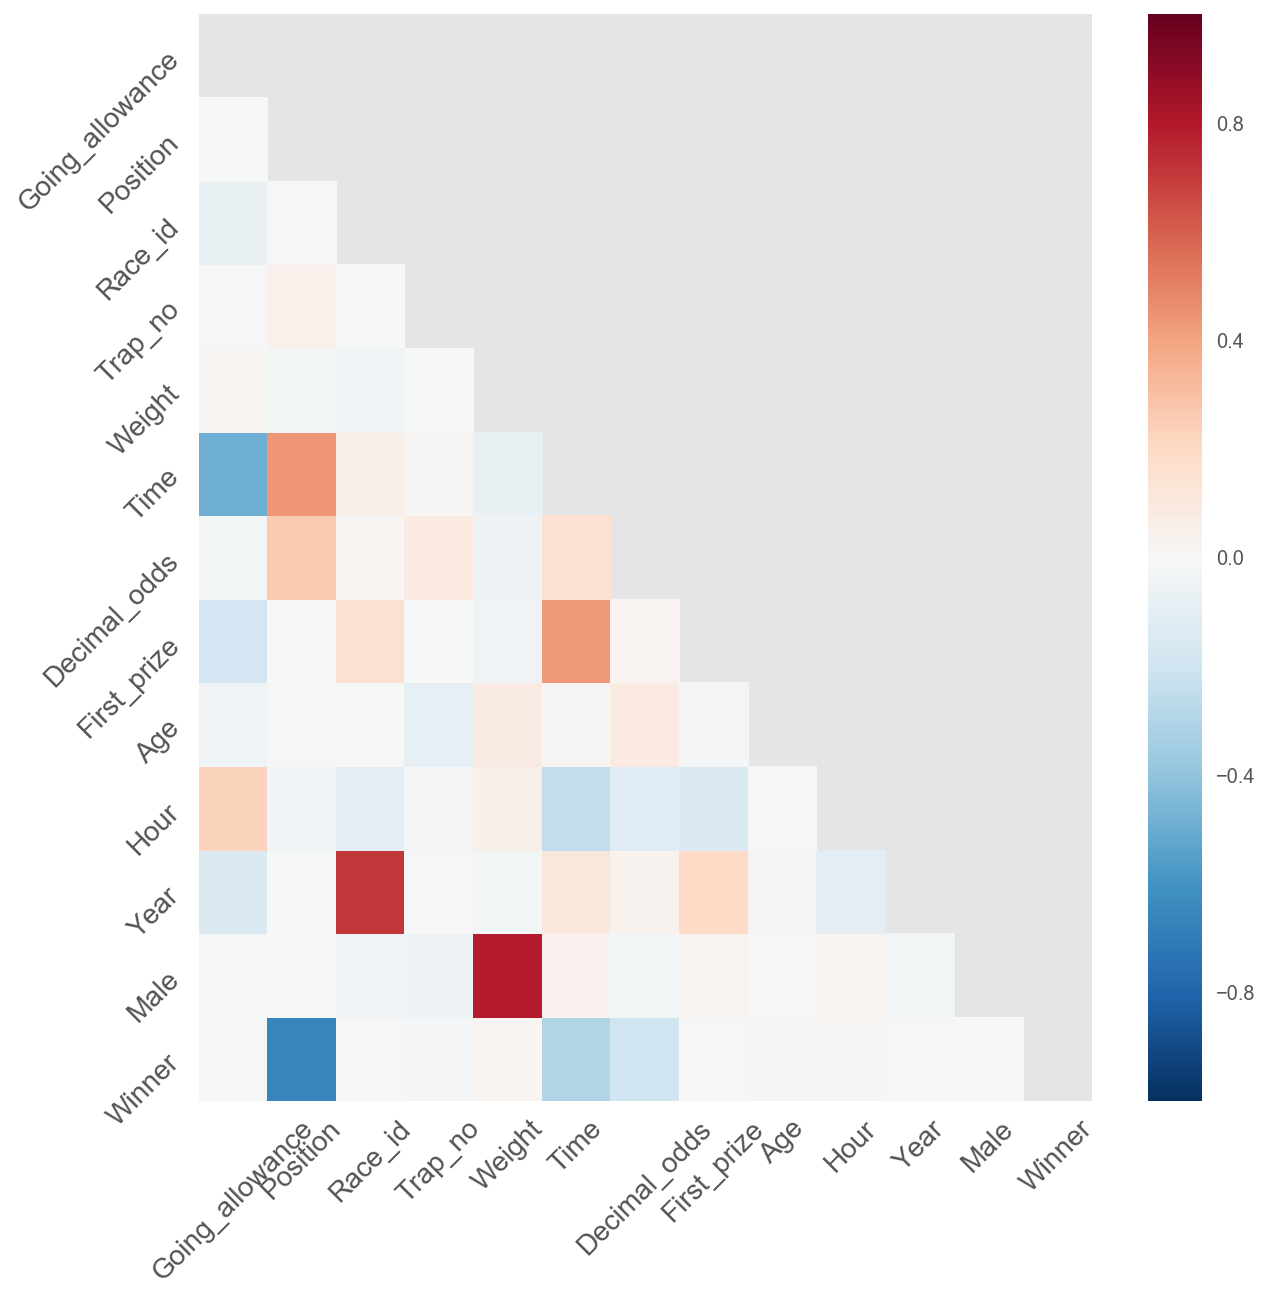

In [25]:
# Produce a Heatmap to see the correlation values for the potential Features.
# List comp to remove Distance column as this is the same throughout
corr = dogs_A1_450[[c for c in dogs_A1_450.columns if c not in ['Distance']]].corr()

fig, ax = plt.subplots(figsize=(10,10))

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

ax = sns.heatmap(corr, mask=mask, ax=ax)

ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=14, rotation=45)
ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=14, rotation=45)

plt.show()

As can be seen from the heatmap above, there were no immediate relationships to investigate.  There were correlations between time and position as well as between odds and position but these would be expected. There was also a very strong correlation between weight and male.

Most features hace a very very weak correlation with each other.  

This was going to require a bit more investigation.

### A quick note on Target Selection

Up until this point, I had been considering a number of targets.  These were mainly Time, Position and Winner.  However after consideration of the correlations noticed so far, and the variables to be considered for predicting Time or Position, Winner seems like the logical choice.  Also it will bring a simplicity and clarity to what is trying to be modelled. 

Thus this helps determine the type of model I will initially use which will be a classification type to begin with. 

Time and Position will be kept as they will help to describe behaviour over time and develop features to engineer...

At this point, I carried out several other data analyses but nothing yielded as much progress as running some models.  As an illustration I show below some interesting relationships with the top 5 winning dogs on the races they've won.

** First I will look at the Dogs who have won**

In [26]:
# Find 
first_A1_450 = dogs_A1_450.loc[dogs_A1_450.Position==1]
first_A1_450.Name.value_counts().head()

Farran Toner        19
Magical Jake        15
Elsaofarendelle     14
Tullig Hailstone    14
Jacks Champ         14
Name: Name, dtype: int64

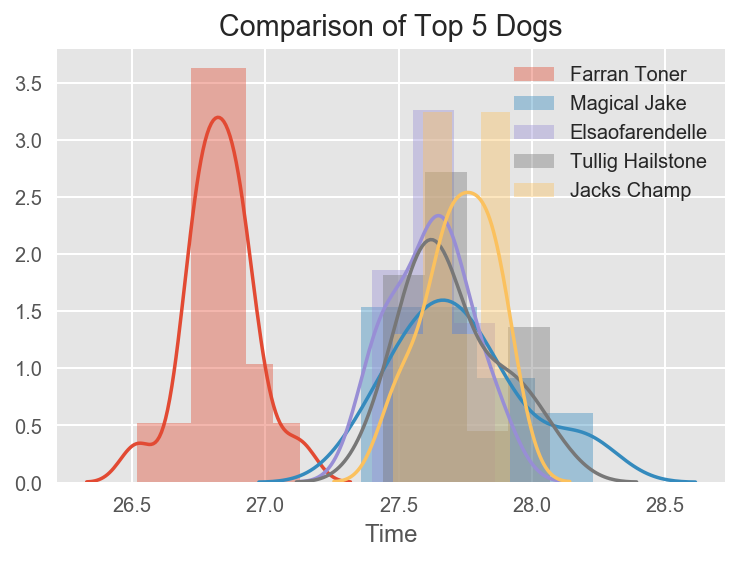

In [27]:
# Plot the top 5 dogs by wins on the same plot and compare times
for name in first_A1_450.Name.value_counts().head().index:
    
    sns.distplot(first_A1_450[first_A1_450['Name'] == name].Time, label=name)
    plt.legend()
plt.title("Comparison of Top 5 Dogs")
plt.show()

/Users/danielpayne/Anaconda/anaconda/lib/python2.7/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


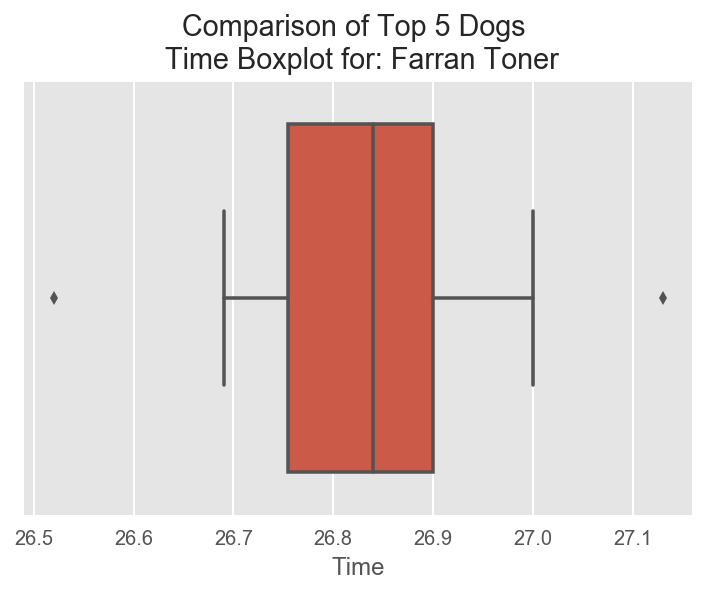

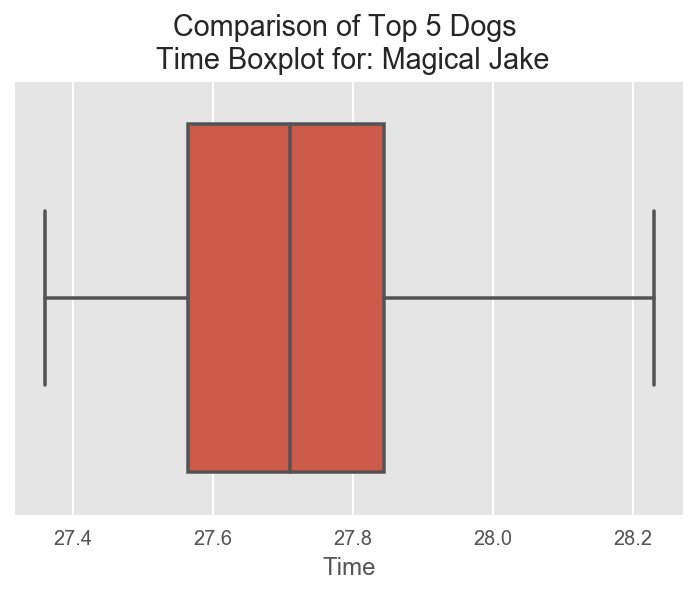

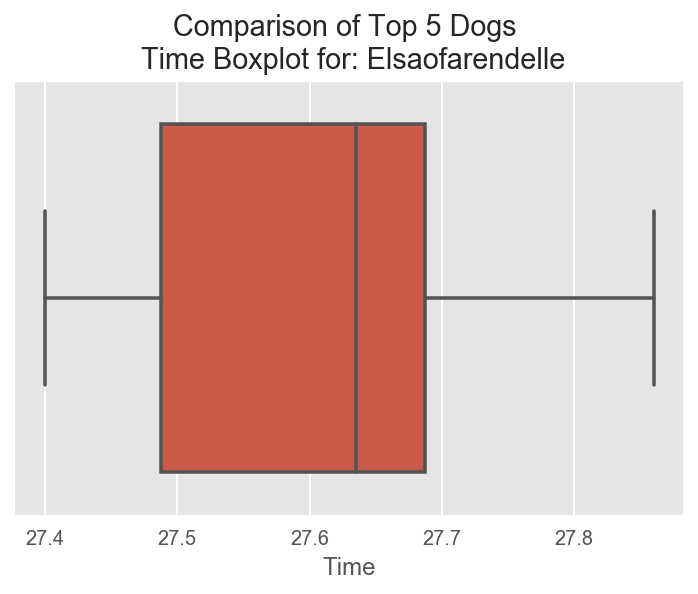

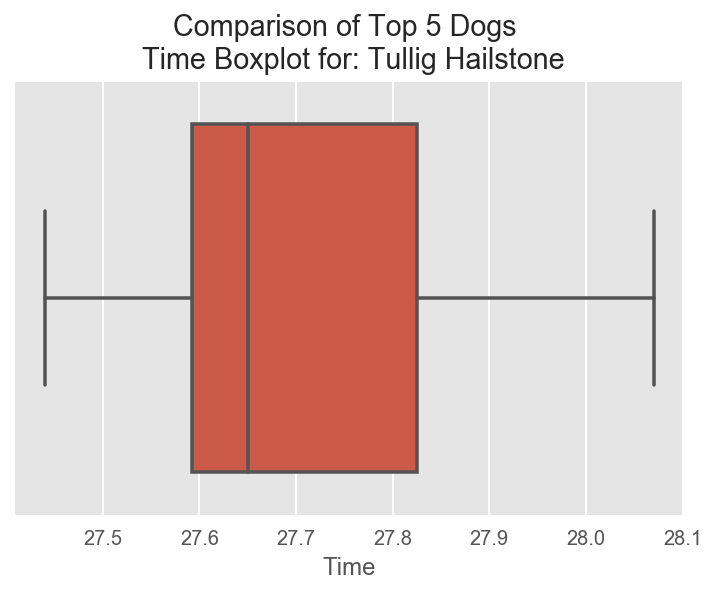

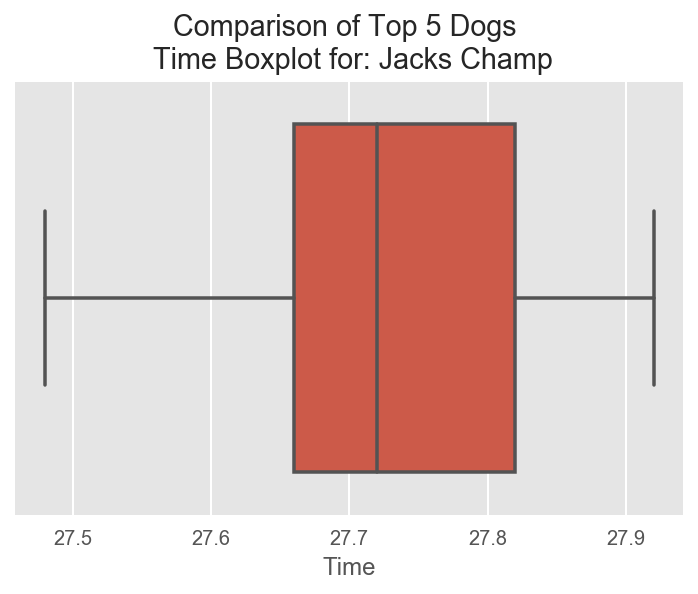

In [28]:
# Plot the top 5 dogs by wins on the same plot and compare times
for name in first_A1_450.Name.value_counts().head().index:
    fig = plt.figure()
    fig.add_subplot()
    sns.boxplot(first_A1_450[first_A1_450['Name'] == name].Time)
    plt.legend()
    plt.title("Comparison of Top 5 Dogs \n Time Boxplot for: "+str(name))
    #plt.title(name)
plt.show()

From the graphs above, we can see that quite clearly Farran Toner seems to be faster by approx a second.  However this could be due to the track or the conditions so it is very hard to understand without slicing up the data many times. 

This data itself is 15-20 for each dog so to slice down even further may make the results meaningless.

Looking at dog's positions...

In [29]:
# Looking at the main dataframe once more
first = dogs[dogs['Position'] == 1]
first.Name.value_counts().head()

Farloe Capri       28
Our Black Dream    26
Farran Toner       25
Charming Woman     24
Best Ace           23
Name: Name, dtype: int64

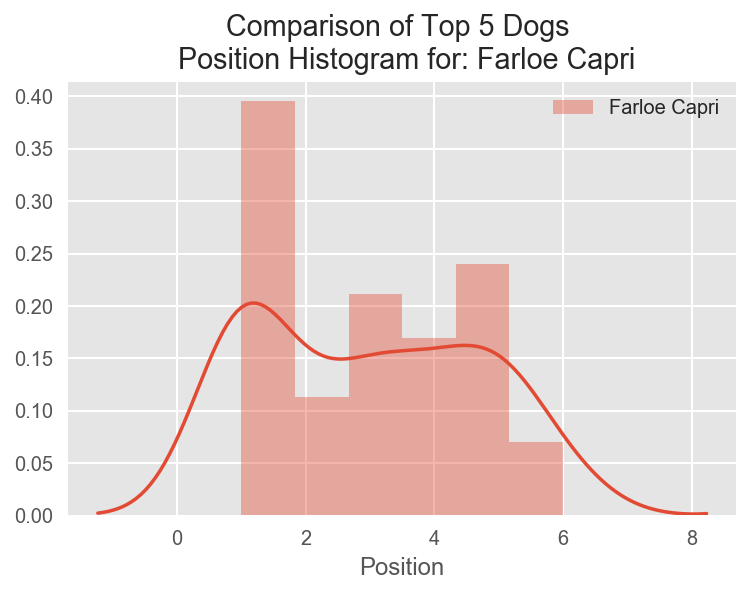

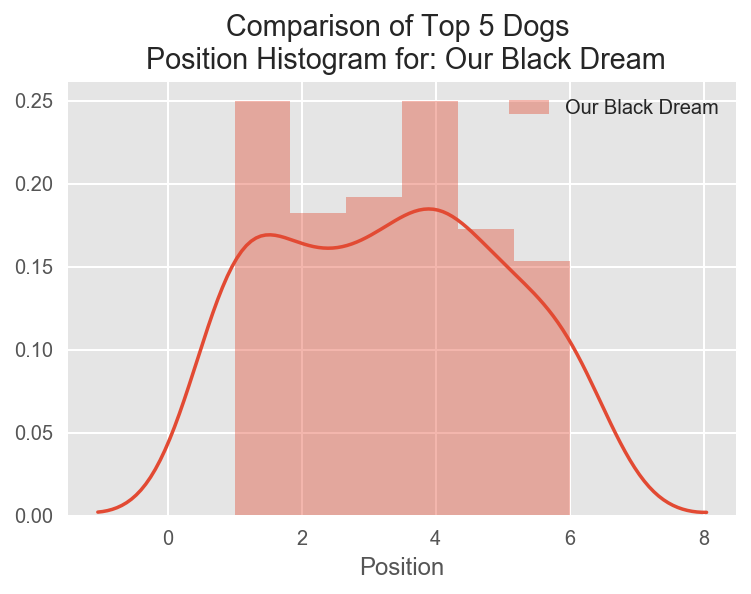

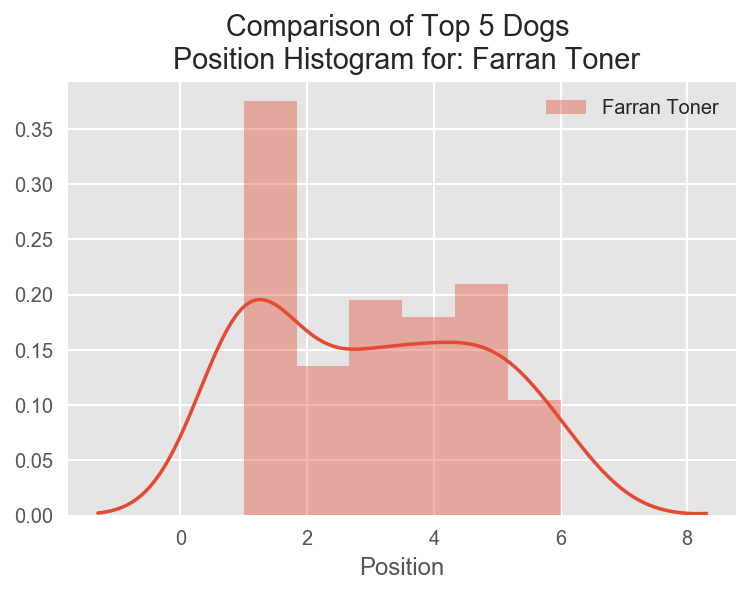

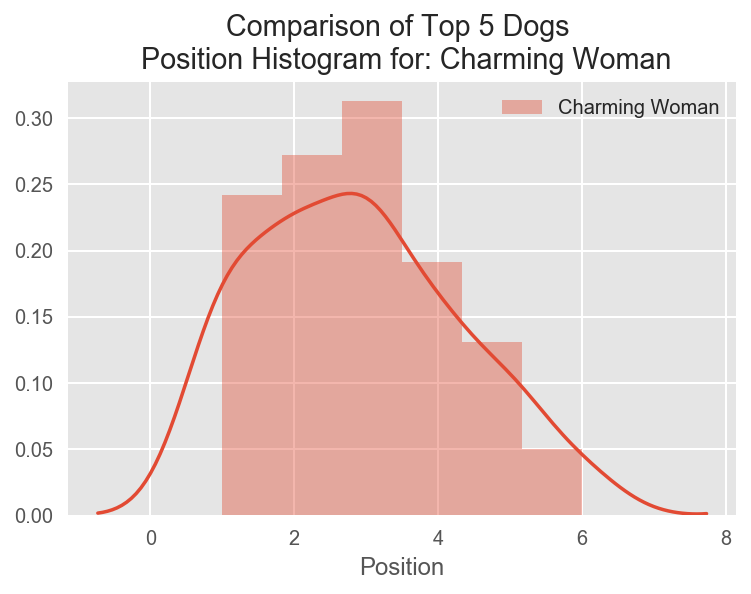

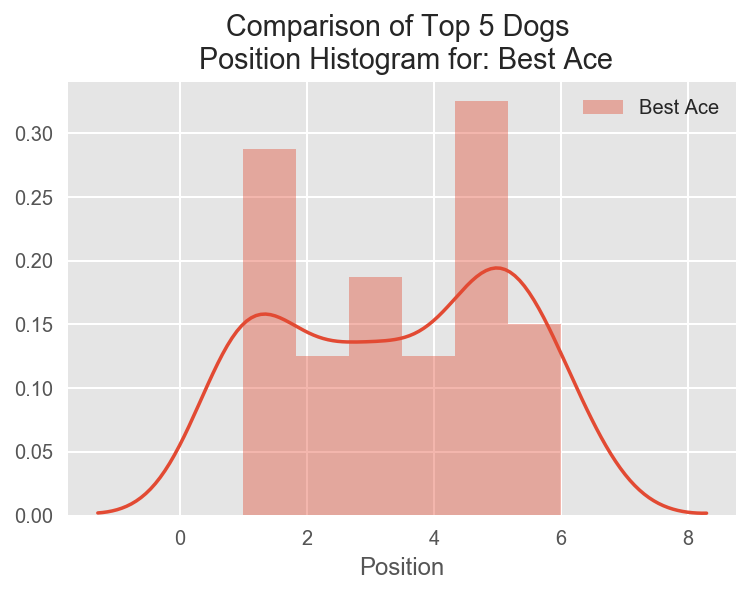

In [30]:
# Look at positions over these dog's races.. 
for name in first.Name.value_counts().head().index:
    fig = plt.figure()
    fig.add_subplot()
    sns.distplot(dogs[dogs['Name'] == name].Position, label=name, bins=6)
    plt.legend()
    plt.title("Comparison of Top 5 Dogs \n Position Histogram for: "+str(name))

The dogs show very interesting distributions for their positions. Some dogs spike around certain positions.  This could be anything from manipulation to racing in different grades or tracks.

It is something to bear in mind later on when trying to tune any models....

<a id = "model_testing"></a>
# <span style="color:darkblue">_Model Pre-processing and Testing_</span>
[back to top](#top)

First I decided to run some models on the cleaned dataframe.  This is effecitvely raw data but I wanted to see how it performed against a baseline.  Also this would give me good guidance as to how effective my tuning and new feature engineering was.

The problem is trying to predict a winner from a historical feature matrix.  Thus a classification problem, I looked to initally test a Logistic Regression and a Random Forest.  I chose these as they are relaiable classifiers and the Random Forest could handle encoding columns as opposed to creating dummies.  KNN is a consideration although it doesn't like many features. 

First I needed to establish the baseline.

In [101]:
dogs = pd.read_csv('clean_gbgb_raw_data.csv')

In [34]:
# Import modules
import patsy
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import (precision_recall_curve, average_precision_score, f1_score)
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from scipy.stats import norm

For the purposes of modelling and efficiency, I am testing the models here using 2016 data as my training set and 2017 data as my test set.  This seems a natural choice as any use will be in predicting real time data. 

In addition this means I can illustrate models effectiveness particularly with regards to Logictic Regression as the increased number of dogs (as well as Sires and Dams) exponentially increses the number of columns as well. 

In [35]:
dogs_16_17 = dogs.loc[(dogs.Year == 2016) | (dogs.Year == 2017)]
dogs_2016 = dogs.loc[dogs.Year == 2016]
dogs_2017 = dogs.loc[dogs.Year == 2017] 

print dogs_16_17.shape, dogs_2016.shape, dogs_2017.shape

(18053, 31) (14077, 31) (3976, 31)


In [36]:
# Look to establish baseline by finding majority class
dogs_16_17.Winner.value_counts()

0    14935
1     3118
Name: Winner, dtype: int64

In [37]:
# Baseline is majority class over total 
Baseline = float(dogs_16_17.Winner.value_counts()[0])/dogs_16_17.Winner.value_counts().sum()

print "Baseline:\t", Baseline

Baseline:	0.827286323603


As most races are on average between 6 dogs, this baseline was to be expected.

#### Pre-Processing steps

Using the Logistic Regression, I will need to standardize the data.  I will also take out columns where I will not have the data beforehand (like previous times and comments on the race although this may come in useful once more for feature engineering).

I will also take out the year and re-append to the stardardized model so I can split into training and test sets.

In [38]:
# There are some columns where the information will not be available beforehand.  I will remove these from the model

cols_to_remove = ['Time', 'Position', 'Time_trap', 'Time_distance', 'Prizes', 'Date_time',
                  'Odds','Comment', 'Date', 'Winner', 'Datetime', 'Random', 'Born', 'Year']
cols_to_model = [c for c in dogs.columns if c not in cols_to_remove]

In [107]:
# Use Patsy to make design matrices
formula  =  "Winner ~" + ' + '.join(cols_to_model)
y, X     =  patsy.dmatrices(formula, data=dogs_16_17, return_type="dataframe")

# Check shape of features and targets as well as Years column
print X.shape, y.shape, dogs_16_17['Year'].shape

(18053, 4295) (18053, 1) (18053,)


In [108]:
# Scale our data first and then split into training and test sets.

#Scaling operation
scaler =  StandardScaler()
cols = X.columns
Xs =  scaler.fit_transform(X)
X = pd.DataFrame(Xs, columns=cols, index = dogs_16_17.index)

#Separate on year both target and features

X['Year'] = dogs_16_17['Year']
y['Year'] = dogs_16_17['Year']

X_train = X.loc[X.Year == 2016]
X_test = X.loc[X.Year == 2017]
y_train = y.loc[y.Year == 2016]
y_test = y.loc[y.Year == 2017]

X_train.drop('Year', axis=1, inplace=True)
X_test.drop('Year', axis=1, inplace=True)

#print shape to check
print X_train.shape, X_test.shape, y_train.shape, y_test.shape

(14077, 4295) (3976, 4295) (14077, 2) (3976, 2)


/Users/danielpayne/Anaconda/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/danielpayne/Anaconda/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [109]:
# Make target as a 1-d array

y_train = y_train.Winner.values
y_test = y_test.Winner.values

print y_train.shape, y_test.shape

(14077,) (3976,)


## Logistic Regression Model

Now I will just try a vanilla Logistic Regression

In [110]:
# Try a vanilla Logistic Regression

lr = LogisticRegression()
lr.fit(X_train, y_train)

lr_prediction = lr.predict(X_test)
lr_vanilla_score = metrics.accuracy_score(y_test, lr_prediction)
print lr_vanilla_score

0.701710261569


As can be seen.  This score is less than the baseline. The model is not perfroming in its current state. 

I will look at the classification report and confustion matrix to see how the model is currently performing

In [111]:
# Look at the Classification report.  

class_report = metrics.classification_report(y_test, lr_prediction)
print class_report

             precision    recall  f1-score   support

        0.0       0.84      0.79      0.81      3289
        1.0       0.21      0.27      0.24       687

avg / total       0.73      0.70      0.71      3976



In [112]:
conmat = metrics.confusion_matrix(y_test, lr_prediction)

In [39]:
# Function to plot a confusion matrix

import itertools

def plot_confusion_matrix(cm, classes, title='Confusion matrix', cmap=plt.cm.Reds):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()
    

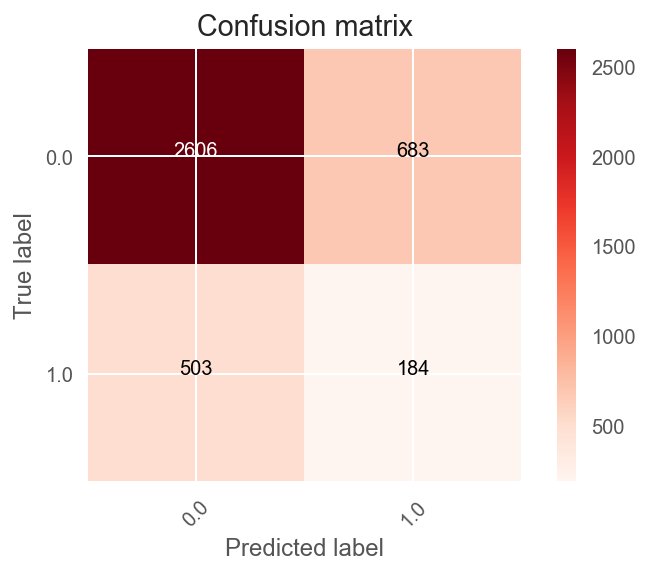

In [113]:
plot_confusion_matrix(conmat, classes=lr.classes_)

In [114]:
prob_lr = lr.predict_proba(X_test)

probability_table = pd.DataFrame({'Probability': prob_lr[:,1],
                                 'Prediction': lr_prediction,
                                 'True result': y_test})

print "Number of classification errors:", np.abs(lr_prediction-y_test).sum()

probability_table.head(10)

Number of classification errors: 1186.0


,Prediction,Probability,True result
0,0.0,0.164804,1.0
1,0.0,0.096461,0.0
2,1.0,0.892101,0.0
3,0.0,0.222768,0.0
4,0.0,0.000047,0.0
5,0.0,0.296134,0.0
6,0.0,0.361062,1.0
7,0.0,0.296905,0.0
8,0.0,0.028454,0.0
9,0.0,0.056698,0.0


The initial results for this are very poor.  

Not only is the accuracy below the baseline but of the 687 winners, we are only predicting 55 of them (8% - this is the recall).

Of the 182 times we predict a winner, on 127 of those occassions, we have the wrong result (30% this is the precision).

Although I could take steps here to tune the model to perform better for precision and recall, the model is fundementally under-performing so I shall look to other models and engineered features before looking at this currently. 

## Decision Tree Classifiers

Although the decision trees are robust enough dummys, they can also handle encoded columns as well.  this will make the process quicker.

First I will make a copy of my dataframe to encode and split into training and test sets.

In [40]:
# Make a copy of the dataframe
dogs_16_17_en = dogs_16_17.copy()

#Use label Encoder to encode columns
name_le = LabelEncoder()
dam_le = LabelEncoder()
sire_le = LabelEncoder()
track_le = LabelEncoder()
grade_le = LabelEncoder()
trainer_le = LabelEncoder()
day_le = LabelEncoder()

dogs_16_17_en.Name = name_le.fit_transform(dogs_16_17_en.Name)
dogs_16_17_en.Dam = dam_le.fit_transform(dogs_16_17_en.Dam)
dogs_16_17_en.Sire = sire_le.fit_transform(dogs_16_17_en.Sire)
dogs_16_17_en.Track = track_le.fit_transform(dogs_16_17_en.Track)
dogs_16_17_en.Grade = grade_le.fit_transform(dogs_16_17_en.Grade)
dogs_16_17_en.Trainer = trainer_le.fit_transform(dogs_16_17_en.Trainer)
dogs_16_17_en.Day = day_le.fit_transform(dogs_16_17_en.Day)

In [41]:
# Make training and test sets of data
training_en = dogs_16_17_en.loc[dogs_16_17_en.Year == 2016]
test_en = dogs_16_17_en.loc[dogs_16_17_en.Year == 2017]

In [42]:
# Using the cols_to_model list from earlier for my feature columns.

X_train_en = training_en[cols_to_model]
X_test_en = test_en[cols_to_model]
y_train_en = training_en.Winner.values
y_test_en = test_en.Winner.values

print X_train_en.shape, X_test_en.shape, y_train_en.shape, y_test_en.shape

(14077, 17) (3976, 17) (14077,) (3976,)


**Now the pre-processing is done, we can run some models.  As the dataframe is smaller then will use GridsearchCV to optimise the model**

In [43]:
#Decision Tree GridsearchCV
dtc_parameters = {'max_depth':np.linspace(1,10,10),
                 'max_features':['auto','sqrt','log2',None],
}
dtc_gs = GridSearchCV(DecisionTreeClassifier(), dtc_parameters, cv=5)
dtc_gs.fit(X_train_en, y_train_en)

GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'max_features': ['auto', 'sqrt', 'log2', None], 'max_depth': array([  1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [44]:
dtc_score = dtc_gs.best_score_
print 'Best Depth', dtc_gs.best_params_
print 'Best Score', dtc_gs.best_score_

Best Depth {'max_features': 'auto', 'max_depth': 1.0}
Best Score 0.827306954607


Vanilla Score: 0.827213279678


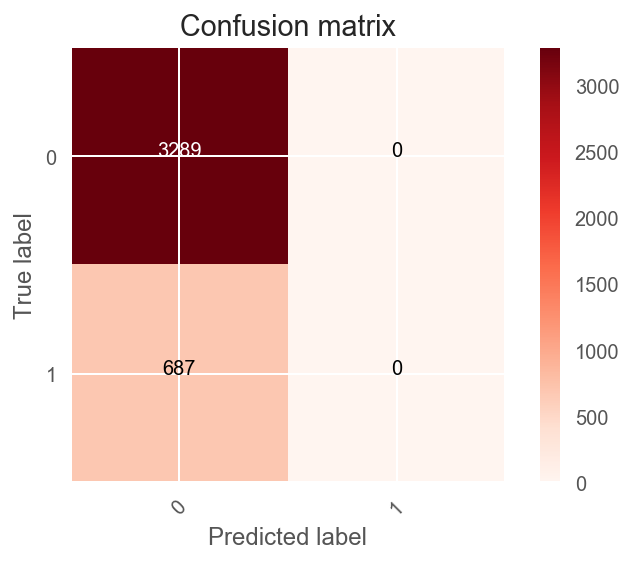

In [45]:
# Initiate and fit model with optimal parameters
dtc = DecisionTreeClassifier(max_features='auto', max_depth=1)
dtc.fit(X_train_en, y_train_en)

dtc_prediction = dtc.predict(X_test_en)
dtc_probs = dtc.predict_proba(X_test_en)
dtc_vanilla_score = metrics.accuracy_score(y_test_en, dtc_prediction)
print 'Vanilla Score:', dtc_vanilla_score

conmat_dtc = metrics.confusion_matrix(y_test_en, dtc_prediction)
plot_confusion_matrix(conmat_dtc, classes=dtc.classes_)

In [47]:
prob_dtc = dtc.predict_proba(X_test_en)

probability_table_dtc = pd.DataFrame({'Probability': prob_dtc[:,1],
                                 'Prediction': dtc_prediction,
                                 'True result': y_test_en})

print "Number of classification errors:", np.abs(dtc_prediction-y_test_en).sum()

probability_table_dtc.head()

Number of classification errors: 687


,Prediction,Probability,True result
0,0,0.179305,1
1,0,0.179305,0
2,0,0.159223,0
3,0,0.159223,0
4,0,0.179305,0


The model again did not perform very well. It is predicting very few correctly and has low recall and precision. 

The score just about equalled the baseline and the optimal tree depth is low which could mean lots of variance in the modelling.

I will try a Random Forest to see if this is any better.

## Random Forest

In [43]:
# Initialise parameters and perform Gridsearch
rfc_parameters = {'max_depth':np.linspace(1,100,10),
                 'max_features':['auto','sqrt','log2',None],
                  'min_samples_leaf': [2, 3, 4, 5]
}
rfc_gs = GridSearchCV(RandomForestClassifier(), rfc_parameters, cv=5, verbose=True)
rfc_gs.fit(X_train_en, y_train_en)

Fitting 5 folds for each of 160 candidates, totalling 800 fits


[Parallel(n_jobs=1)]: Done 800 out of 800 | elapsed:  4.9min finished


GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'max_features': ['auto', 'sqrt', 'log2', None], 'max_depth': array([   1.,   12.,   23.,   34.,   45.,   56.,   67.,   78.,   89.,  100.]), 'min_samples_leaf': [2, 3, 4, 5]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=True)

In [44]:
rfc_score = rfc_gs.best_score_
print 'Best Depth', rfc_gs.best_params_
print 'Best Score', rfc_gs.best_score_

Best Depth {'max_features': 'auto', 'max_depth': 1.0, 'min_samples_leaf': 2}
Best Score 0.827306954607


0.827213279678


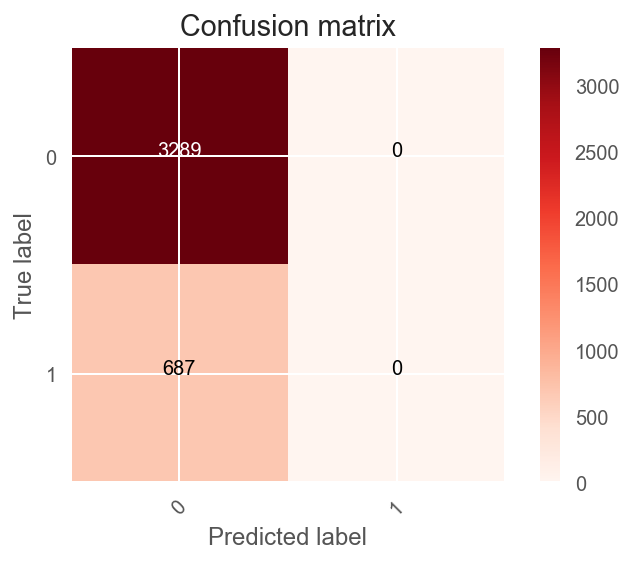

In [45]:
#Try model with best parameters
rfc = DecisionTreeClassifier(max_features='auto', max_depth=1, min_samples_leaf = 2)
rfc.fit(X_train_en, y_train_en)

# Get prediction, probability and score and plot confustion matrix
rfc_prediction = rfc.predict(X_test_en)
rfc_probs = rfc.predict_proba(X_test_en)
rfc_vanilla_score = metrics.accuracy_score(y_test_en, rfc_prediction)
print rfc_vanilla_score
conmat_rfc = metrics.confusion_matrix(y_test_en, rfc_prediction)
plot_confusion_matrix(conmat_rfc, classes= rfc.classes_)

In [128]:
prob_rfc = rfc.predict_proba(X_test_en)

probability_table_rfc = pd.DataFrame({'Probability': prob_rfc[:,1],
                                 'Prediction': rfc_prediction,
                                 'True result': y_test})

print "Number of classification errors:", np.abs(rfc_prediction-y_test).sum()

probability_table_rfc.head(10)

Number of classification errors: 687.0


,Prediction,Probability,True result
0,0,0.177451,1.0
1,0,0.177451,0.0
2,0,0.177451,0.0
3,0,0.160710,0.0
4,0,0.160710,0.0
5,0,0.177451,0.0
6,0,0.177451,1.0
7,0,0.160710,0.0
8,0,0.177451,0.0
9,0,0.160710,0.0


The Random Forest didn't perform at all well and just getting the baseline.  It didn't predict any winners at all and the result seems odd.

### Initial Observations

All of the models did not perform better than the baseline.  They all had precision and recall issues and seemed to make no discernable accurate prediction.  

This is on the raw data and some research and feature Engineering will hopefully correct this.

<a id = "feature_engineering"></a>
# <span style="color:darkblue">_Further research and Feature Engineering_</span>
[back to top](#top)

<img src="images/greyhound_cheating.jpg" width = 600>

Further research and talking to some people who have bred and raced Greyhounds revealed some deep level result manipulation. This allied to tricks to lengthen odds on fast greyhounds, slow down competitors and even switch dogs in some cases, meant that the problem would be difficult to map. Some of the methods used by trainers include:

- Greasing Traps of a competitors Dog meaning they have a bad getaway
- Doping the Dogs with Cocaine or a Steroid
- If a female dog, lying about whether it is in season or not. (They tend to be slower in season)
- Slowing the dogs down by maybe feeding before a race.  They lose but odds lengthen and then they make them win again.
- Slowing them down to lower grades where they can choose when to win
- Switching dogs!

First I wanted to look at the behaviour in terms of position of some individual dogs.  We looked at Farran Toner and Farloe Capri earlier on as theywere both top 5 dogs.  

We'll have a look at their position distribution over the last races.

In [49]:
# Set the date as the index and sort into chronological order.
# Knowing some later transformation reset the index to a numerical one, I am keeing original column.


dogs_16_17 = dogs_16_17.set_index(['Date_time'], drop=False)
dogs_16_17 = dogs_16_17.sort_index()

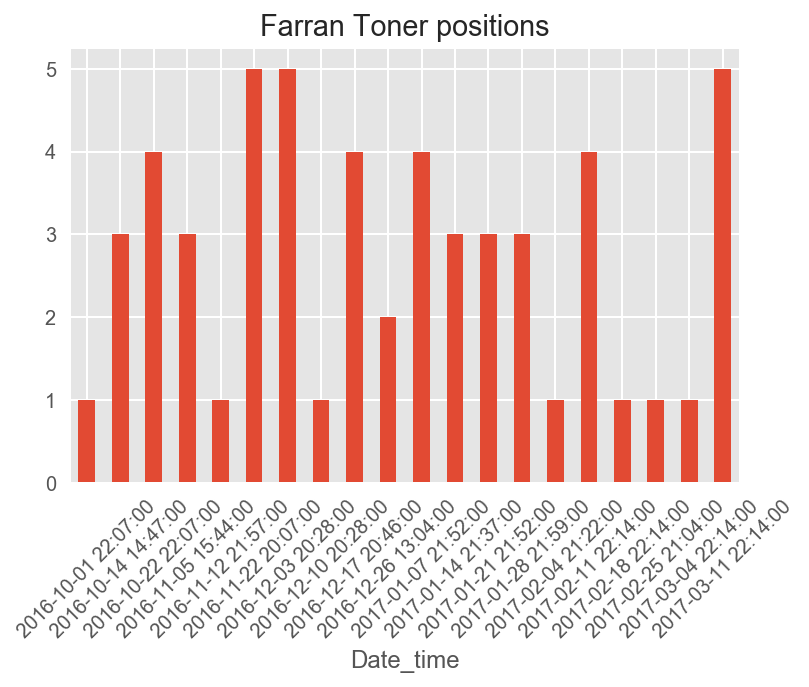

In [146]:
# Look at last 20 races for dog "Farran Toner"
Farran_toner = dogs_16_17[dogs_16_17['Name'] == 'Farran Toner'].sort_index()
#plt.bar(Farran_toner.index[-20:], Farran_toner.Position[-20:])
Farran_toner.Position[-20:].plot(kind='bar')
plt.xticks(rotation=45)
plt.title('Farran Toner positions')
plt.show()

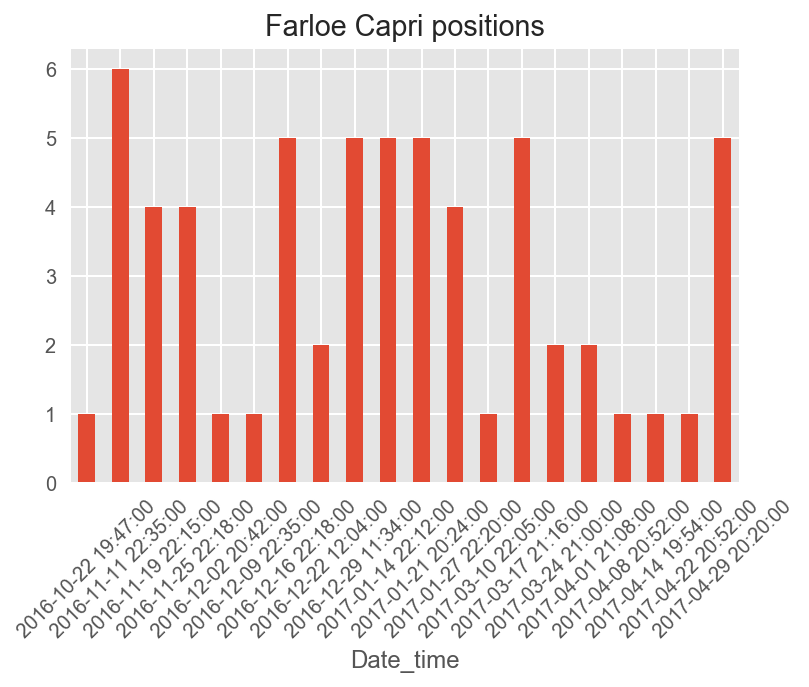

In [51]:
# Look at last 20 races for dog "Farloe Capri"
Farloe = dogs_16_17[dogs_16_17['Name'] == 'Farloe Capri'].sort_index()
#plt.bar(Farloe.index[-20:], Farloe.Position[-20:])
Farloe.Position[-20:].plot(kind='bar')
plt.xticks(rotation=45)
plt.title('Farloe Capri positions')
plt.show()


From looking at these graphs the dogs appear to go in and out of "form" quite a bit.  This may help tune our model to predict better.

Will write a function to show form over the last 3 races.  This will look at the last 3 results and take the mean of the last 3 races.  As there is 1 for a win and 0 for a loss, if it has an average of 1 then it has won the last 3 races etc.

## Winning Form

In [147]:
# Set the date as the index and sort into chronological order.
# Knowing some later transformation reset the index to a numerical one, I am keeing original column.
dogs = dogs.set_index(['Date_time'], drop=False)
dogs = dogs.sort_index()

In [148]:
# Write function to measure mean of last n race results 
def form_builder(dog_name, races):
    df = dogs.loc[dogs['Name'] == dog_name]
    df['Form'] = df['Winner'].rolling(window = races, center=False).mean()
    return df.Form

In [149]:
# Create a series object for form of last 3 races that I can add onto Dataframe
form_3 = pd.Series()
for dog in dogs.Name.unique():
    temp_form = form_builder(dog, 3)
    form_3 = form_3.append(temp_form)

/Users/danielpayne/Anaconda/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [150]:
# Make sure index is sorted as the df has a sorted index
form_3 = form_3.sort_index()

# Then append onto Dataframe:
dogs['Form_3'] = form_3

# Check Dataframe.  Look at the end as first values will always be NaNs. 
dogs.tail()

,Born,Comment,Dam,Date,Datetime,Distance,Going_allowance,Grade,Name,Odds,...,Decimal_odds,First_prize,Date_time,Age,Day,Hour,Year,Male,Winner,Form_3
Date_time,,,,,,,,,,,,,,,,,,,,,
2017-04-29 22:30:00,2015-03-01,CrdRunUp&1,Miss Lochdeise,29/04/17,22:30,450.0,0.0,A1,For The Crack,4/1,...,5.0,143,2017-04-29 22:30:00,790,Saturday,22,2017,0,0,0.333333
2017-04-29 22:30:00,2014-07-01,CrdRunUp,Minister Hill,29/04/17,22:30,450.0,0.0,A1,Vinegarhill Joey,3/1,...,4.0,143,2017-04-29 22:30:00,1033,Saturday,22,2017,0,0,0.000000
2017-04-29 22:30:00,2014-06-01,BCrd1,Rockburst Pearl,29/04/17,22:30,450.0,0.0,A1,Dinnington Pearl,4/1,...,5.0,143,2017-04-29 22:30:00,1063,Saturday,22,2017,0,0,0.333333
2017-04-29 22:30:00,2013-08-01,RanOn,Rising Pearl,29/04/17,22:30,450.0,0.0,A1,Riverside Bolt,5/2,...,3.5,143,2017-04-29 22:30:00,1367,Saturday,22,2017,0,0,0.000000
2017-04-29 22:30:00,2015-04-01,"QAw,AlwaysLed",Flimsy Truth,29/04/17,22:30,450.0,0.0,A1,Slatta Ducky,6/4F,...,2.5,143,2017-04-29 22:30:00,759,Saturday,22,2017,0,1,0.666667


With the form for the last 3 races now added to the dataframe, I will do the same but for the last 5 races.

Notice above how the index has been reset to a numerical value.

I shall now make the index Datetime again to do the form for last 5 races.

In [63]:
# Set the date as the index and sort into chronological order.
# Knowing some later transformation reset the index to a numerical one, I am keeing original column.
#dogs = dogs.set_index(['Date_time'], drop=False)
#dogs = dogs.sort_index()

In [151]:
# Do the same but for last 5 races
form_5 = pd.Series()
for dog in dogs.Name.unique():
    temp_form = form_builder(dog, 5)
    form_5 = form_5.append(temp_form)

/Users/danielpayne/Anaconda/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [152]:
# Make sure index is sorted as the df has a sorted index
form_5 = form_5.sort_index()

# Then append onto Dataframe:
dogs['Form_5'] = form_5

# Check Dataframe.  Look at the end as first values will always be NaNs. 
dogs.tail()

,Born,Comment,Dam,Date,Datetime,Distance,Going_allowance,Grade,Name,Odds,...,First_prize,Date_time,Age,Day,Hour,Year,Male,Winner,Form_3,Form_5
Date_time,,,,,,,,,,,,,,,,,,,,,
2017-04-29 22:30:00,2015-03-01,CrdRunUp&1,Miss Lochdeise,29/04/17,22:30,450.0,0.0,A1,For The Crack,4/1,...,143,2017-04-29 22:30:00,790,Saturday,22,2017,0,0,0.333333,0.2
2017-04-29 22:30:00,2014-07-01,CrdRunUp,Minister Hill,29/04/17,22:30,450.0,0.0,A1,Vinegarhill Joey,3/1,...,143,2017-04-29 22:30:00,1033,Saturday,22,2017,0,0,0.000000,0.0
2017-04-29 22:30:00,2014-06-01,BCrd1,Rockburst Pearl,29/04/17,22:30,450.0,0.0,A1,Dinnington Pearl,4/1,...,143,2017-04-29 22:30:00,1063,Saturday,22,2017,0,0,0.333333,0.4
2017-04-29 22:30:00,2013-08-01,RanOn,Rising Pearl,29/04/17,22:30,450.0,0.0,A1,Riverside Bolt,5/2,...,143,2017-04-29 22:30:00,1367,Saturday,22,2017,0,0,0.000000,0.2
2017-04-29 22:30:00,2015-04-01,"QAw,AlwaysLed",Flimsy Truth,29/04/17,22:30,450.0,0.0,A1,Slatta Ducky,6/4F,...,143,2017-04-29 22:30:00,759,Saturday,22,2017,0,1,0.666667,0.4


Now that I have made my first new features, I shall try a model on the new Dataframe.

As the form calculation will have a null value for the first 3 races for each Dog, I will check for NaN's and fill them with zero...

In [153]:
dogs.isnull().sum()

Born                  0
Comment               0
Dam                   0
Date                  0
Datetime              0
Distance              0
Going_allowance       0
Grade                 0
Name                  0
Odds                  0
Position              0
Prizes                0
Race_id               0
Random                0
Sire                  0
Time_distance         0
Time_trap             0
Track                 0
Trainer               0
Trap_no               0
Weight                0
Time                  0
Decimal_odds          0
First_prize           0
Date_time             0
Age                   0
Day                   0
Hour                  0
Year                  0
Male                  0
Winner                0
Form_3             5781
Form_5             9087
dtype: int64

In [154]:
dogs.fillna(0, axis=1, inplace=True)

Again this score does not represent any real progress although this is heading in the right direction.  

Will have to look at making more features and seeing if these have an effect.

In the feature that I engineered, I looked at the form in respect of whether the dog had won or not.  I can do something similar with the position.  This will tell us something different.  

It will describe how well a dog did or didn't do.  So if a dog won a race but then finished last in the next race as opposed to second then you may think that the result is being manipulated or it has been entered into a grade of race that it doesn't belong in.

## Positional Form

In [168]:
# Define a function that finds the form based on position. Can specify the the form "window".  

def form_pos_builder(dog_name, races): 
    df = dogs.loc[dogs['Name'] == dog_name]
    df['Form'] = df['Position'].rolling(window = races, center=False).mean()
    return df.Form

In [169]:
# Create a series object for form of last 3 races that I can add onto Dataframe
form_pos_3 = pd.Series()
for dog in dogs.Name.unique():
    temp_form = form_pos_builder(dog, 3)
    form_pos_3 = form_pos_3.append(temp_form)

/Users/danielpayne/Anaconda/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [170]:
# Make sure index is sorted as the df has a sorted index
form_pos_3 = form_pos_3.sort_index()

# Then append onto Dataframe:
dogs['Form_Pos_3'] = form_pos_3

# Check Dataframe.  Look at the end as first values will always be NaNs. 
dogs.tail()

,Born,Comment,Dam,Date,Datetime,Distance,Going_allowance,Grade,Name,Odds,...,Date_time,Age,Day,Hour,Year,Male,Winner,Form_3,Form_5,Form_Pos_3
Date_time,,,,,,,,,,,,,,,,,,,,,
2017-04-29 22:30:00,2015-03-01,CrdRunUp&1,Miss Lochdeise,29/04/17,22:30,450.0,0.0,A1,For The Crack,4/1,...,2017-04-29 22:30:00,790,Saturday,22,2017,0,0,0.333333,0.2,2.333333
2017-04-29 22:30:00,2014-07-01,CrdRunUp,Minister Hill,29/04/17,22:30,450.0,0.0,A1,Vinegarhill Joey,3/1,...,2017-04-29 22:30:00,1033,Saturday,22,2017,0,0,0.000000,0.0,4.666667
2017-04-29 22:30:00,2014-06-01,BCrd1,Rockburst Pearl,29/04/17,22:30,450.0,0.0,A1,Dinnington Pearl,4/1,...,2017-04-29 22:30:00,1063,Saturday,22,2017,0,0,0.333333,0.4,2.333333
2017-04-29 22:30:00,2013-08-01,RanOn,Rising Pearl,29/04/17,22:30,450.0,0.0,A1,Riverside Bolt,5/2,...,2017-04-29 22:30:00,1367,Saturday,22,2017,0,0,0.000000,0.2,3.666667
2017-04-29 22:30:00,2015-04-01,"QAw,AlwaysLed",Flimsy Truth,29/04/17,22:30,450.0,0.0,A1,Slatta Ducky,6/4F,...,2017-04-29 22:30:00,759,Saturday,22,2017,0,1,0.666667,0.4,1.333333


Repeat the process for the last 5 races....

In [171]:
# Create a series object for form of last 5 races that I can add onto Dataframe
form_pos_5 = pd.Series()
for dog in dogs.Name.unique():
    temp_form = form_pos_builder(dog, 5)
    form_pos_5 = form_pos_5.append(temp_form)

/Users/danielpayne/Anaconda/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [172]:
# Make sure index is sorted as the df has a sorted index
form_pos_5 = form_pos_5.sort_index()

# Then append onto Dataframe:
dogs['Form_Pos_5'] = form_pos_5

# Check Dataframe.  Look at the end as first values will always be NaNs. 
dogs.tail()

,Born,Comment,Dam,Date,Datetime,Distance,Going_allowance,Grade,Name,Odds,...,Age,Day,Hour,Year,Male,Winner,Form_3,Form_5,Form_Pos_3,Form_Pos_5
Date_time,,,,,,,,,,,,,,,,,,,,,
2017-04-29 22:30:00,2015-03-01,CrdRunUp&1,Miss Lochdeise,29/04/17,22:30,450.0,0.0,A1,For The Crack,4/1,...,790,Saturday,22,2017,0,0,0.333333,0.2,2.333333,2.8
2017-04-29 22:30:00,2014-07-01,CrdRunUp,Minister Hill,29/04/17,22:30,450.0,0.0,A1,Vinegarhill Joey,3/1,...,1033,Saturday,22,2017,0,0,0.000000,0.0,4.666667,4.0
2017-04-29 22:30:00,2014-06-01,BCrd1,Rockburst Pearl,29/04/17,22:30,450.0,0.0,A1,Dinnington Pearl,4/1,...,1063,Saturday,22,2017,0,0,0.333333,0.4,2.333333,2.6
2017-04-29 22:30:00,2013-08-01,RanOn,Rising Pearl,29/04/17,22:30,450.0,0.0,A1,Riverside Bolt,5/2,...,1367,Saturday,22,2017,0,0,0.000000,0.2,3.666667,3.2
2017-04-29 22:30:00,2015-04-01,"QAw,AlwaysLed",Flimsy Truth,29/04/17,22:30,450.0,0.0,A1,Slatta Ducky,6/4F,...,759,Saturday,22,2017,0,1,0.666667,0.4,1.333333,2.0


In [173]:
# The form builders introduce NaNs to the dataframe.  I will fill these in a zero so the data can be processed by the model. 
dogs.fillna(0, axis=1, inplace=True)

## Trend Features

This feature is just a measure of weather a dog is coming into form or going out of form.

In [191]:
# Define the function and look at whether the form columns are on upward or downward trend.
def form_describer(dog_name):
    trend_list = []
    df = dogs.loc[dogs['Name'] == dog_name]
    for i in range(1, len(df.Form_3)):
        trend = df.Form_3.iloc[i] - df.Form_3.iloc[i-1]
        trend_list.append(trend)
    trend_list.insert(0, 0)
    df['Trend'] = trend_list
    return df.Trend

In [192]:
# Make Series object to attach to dataframe
trend_3 = pd.Series()
for dog in dogs.Name.unique():
    temp_trend = form_describer(dog)
    trend_3 = trend_3.append(temp_trend)
    
print len(trend_3), dogs.shape[0]

/Users/danielpayne/Anaconda/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


26439 26439


In [193]:
# Reset the trend index
trend_3 = trend_3.sort_index()

# Make the Trend column
dogs['Trend_3'] = trend_3

# Check dataframe
dogs.tail()

,Born,Comment,Dam,Date,Datetime,Distance,Going_allowance,Grade,Name,Odds,...,Day,Hour,Year,Male,Winner,Form_3,Form_5,Form_Pos_3,Form_Pos_5,Trend_3
Date_time,,,,,,,,,,,,,,,,,,,,,
2017-04-29 22:30:00,2015-03-01,CrdRunUp&1,Miss Lochdeise,29/04/17,22:30,450.0,0.0,A1,For The Crack,4/1,...,Saturday,22,2017,0,0,0.333333,0.2,2.333333,2.8,-0.333333
2017-04-29 22:30:00,2014-07-01,CrdRunUp,Minister Hill,29/04/17,22:30,450.0,0.0,A1,Vinegarhill Joey,3/1,...,Saturday,22,2017,0,0,0.000000,0.0,4.666667,4.0,0.333333
2017-04-29 22:30:00,2014-06-01,BCrd1,Rockburst Pearl,29/04/17,22:30,450.0,0.0,A1,Dinnington Pearl,4/1,...,Saturday,22,2017,0,0,0.333333,0.4,2.333333,2.6,-0.333333
2017-04-29 22:30:00,2013-08-01,RanOn,Rising Pearl,29/04/17,22:30,450.0,0.0,A1,Riverside Bolt,5/2,...,Saturday,22,2017,0,0,0.000000,0.2,3.666667,3.2,0.000000
2017-04-29 22:30:00,2015-04-01,"QAw,AlwaysLed",Flimsy Truth,29/04/17,22:30,450.0,0.0,A1,Slatta Ducky,6/4F,...,Saturday,22,2017,0,1,0.666667,0.4,1.333333,2.0,0.333333


In [213]:
dogs.to_csv('clean_gbgb_data_w_features.csv', encoding = 'utf-8', index=False)

In [ ]:
# Postgres doesn't like numbers or uppercase letters in column names. 

dogs.columns = [c.lower() for c in dogs.columns]

from sqlalchemy import create_engine
engine = create_engine('postgresql://localhost:5432/danielpayne')

dogs.to_sql('top_dogs', engine)

<a id = "assessment"></a>
# Assessment
[back to top](#top)

The models are barely scoring above the baseline currently.  There are a number of reasons why this could be.

Here are the scores for the 3 models I tested:

**Baseline: 0.827**

|   |   |   |   |   
|---|---|---|---|
|**Features Added**|**Logistic Regression Model**|**Decision Tree**|**Random Forest**|
|Vanilla| 0.701 | 0.827 | 0.827 |
|Win Form| 0.701 | 0.827 | 0.827 |
|Positional Form| 0.701 | 0.827 | 0.827 |
|Trend Form|  0.703 | 0.827 | 0.827 |

Initially one of the things I thought could be wrong is that as I was using datetime information, the top 100 dogs dataframe will have missing information for my new engineered features so I experiemented on this.  However, this did no yield any different results.

### Saving to a relational database

One of the problems with the full 2016 dataset is the size.  This is particularly a problem for a model like Logistic Regression where dummy columns are required as the design matrix explodes in size.

In order to tune the model and get round problems I've mentioned in the assessment, I can take slices of the dataframe to make this more manageable.  This will be easiest from something like PostgresSQL.

In [ ]:
# The full training dataset for 2016 I have saved under training data
dog_full_data = pd.read_csv('training_data.csv')
dog_full_data.drop('Unnamed: 0', axis=1, inplace=True)

In [ ]:
# Postgres doesn't like numbers or uppercase letters in column names. 

dog_full_data.columns = [c.lower() for c in dog_full_data.columns]

dog_full_data.to_sql('training_data', engine)

In [246]:
dog_test_data = pd.read_csv('test_data.csv')

In [247]:
# Postgres doesn't like numbers or uppercase letters in column names. 

dog_test_data.columns = [c.lower() for c in dog_test_data.columns]

dog_test_data.to_sql('test_data', engine)

What in fact was going wrong was that I was hoping the model would recognise each race and group the dogs by race id.  However, the model was trying to predict whether the dog would be a winner for each row and comparing to the rest of the dataframe.  

## New Target Selection

A different approach was then needed.

It was very difficult to make the model assess the dogs on a race by race basis alone.  Therefore what I decided tyo look at was trying to still use a classification approach but use a Linear Model as an engine to predict the time for each dog.

I could then rank each dogs time in each race to predict a winner.

Due to a lack of time I was not able to look at this thoroughly to date but I have experiemtned with this on a smaller dataframe to demonstrate the rationale and methodology.  Please see the link to this demonstration below. 

Link to [Linear Regression based Class Model](Linear_Regression_Models.ipynb)

## Further Exploration

Following the success of the Linear model approach then I shall look further at tuning and engineering features once I break the Baseline.  The inital results are encouraging.

Further into the future I shall look at:

- Time Series Analysis and Arima Models
- Monte Carlo Markov Chains

The above models take into account the trend data in terms of a dogs performace over time.  The MCMC model will look at a Bayesian approach to each race and assess a greyhounds chances of success given the dogs he/she is racing against. 

## Tuning Model over time and Maintenence

On the assumption that the model is now working perfectly, there are several factors that need to be looked at over time in order to keep the model working.

There are obvious retraining of features - noticeably the introduction of new data on a daily basis. 

However there are key points which must be noted to ensure the validity of a working model:

- The rolling averages and form will change over time
- There may be dogs or trainers who have found to be complicit in cheating.  This can be used to tune the model
- There could be surface or relaying of tracks which would affect things like "Going Allowance" which measures the pace of the racing surface
- Greyhound racing is a declining sport and so some tracks close (Most famously Catford, Wimbledon and Walthamstow in London
- There is health information regarding a dog.  Any injuries would have a degrading affect on the time it is able to run
- Female dogs (Bitches) go in and out of "Season".  This is when they are in a mating cycle and they perform worse when they are in this period.
- Any change in the calculation of how Bookmakers comput their odds.  The model does rely on this as a feature and it something that correlate hightly.  Therefore any change in methodology here would require a change in modelling.

## Production Environment

The predictive power of the model will rely on how soon the model has information.  The frequency of dog races in the UK is very high and minutes can separate each race.

In order to keep the model in an optimal state, one would look to run this on a spark framework so the model can be updated as soon as there is new data.

Many of the features rely on the dogs current form or performance so this will be key to the operational maintenence of the model in a professional environment.

# Blog Post!!!!

https://greyhounds2017.wordpress.com/